Name - Aye Chan Moe

Student ID - X00230988

# Introduction

This CA describes the development and analysis deep learning models for predicting the probability of diabetes in individuals using health parameters. The main goal is to implement basic algorithms in artificial neural networks (ANN) for classification problem. The aim is also to try different network architectures, carry out extensive hyperparameter-tuning, with the choice of a single model with strong generalization ability. Furthermore, there is an emphasize on ethical AI by including transparency and explainability in the AI model.

The main features of this project are:
*   Exploratory Data Analysis (EDA) to explore the distributions and relationships of features.
*   Preprocessing data to generate inputs that are suitable for training neural network.
*   Iterative model development, exploring eight network topologies.
*   Tuning hyperparameters including learning rate, optimizer, batch size, regularization.
*   Grid search for best model parameterization.
*   Model performance will be evaluated with accuracy, precision, recall and F1- score.
*   Analysis of sub-group model performance (e.g., sex and age) to assess for biases.

# Opening the Dataset, Brief Data Exploration and Pre-processing

In this section, we load the dataset, perform simple Exploratory Data Analysis (EDA), and do some data preprocessing for training with neural network.

## Loading the Dataset

The data used comes from the Behavior Risk Factor Surveillance System (BRFSS) and features health data for predicting the presence of diabetes. The dependent variable here is Diabetes_binary which is a binary variable (0= No Diabetes, 1 = Diabetes).


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Load dataset
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('X00230988.csv')

Saving X00230988.csv to X00230988 (3).csv


## Brief Data Exploration

The dataset contains 42415 observations and 22 attributes (21 predictors and 1 target). For getting to know the dataset, we look at feature distributions, look for class imbalance, and for correlation between variables.

In [3]:
# Display basic information
print("Dataset Shape:", df.shape)
print("\nColumn Names:", df.columns.tolist())
print("\nData Types:")
print(df.dtypes)

Dataset Shape: (42415, 22)

Column Names: ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income', 'Diabetes_binary']

Data Types:
HighBP                  int64
HighChol                int64
CholCheck               int64
BMI                     int64
Smoker                  int64
Stroke                  int64
HeartDiseaseorAttack    int64
PhysActivity            int64
Fruits                  int64
Veggies                 int64
HvyAlcoholConsump       int64
AnyHealthcare           int64
NoDocbcCost             int64
GenHlth                 int64
MentHlth                int64
PhysHlth                int64
DiffWalk                int64
Sex                     int64
Age                     int64
Education               int64
Income                  int64
Diabetes_binary         int64
dtype

In [4]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
Diabetes_binary         0
dtype: int64


In [5]:
# Preview the first few rows
df.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
0,1,0,1,43,0,0,0,0,0,1,...,0,2,1,0,0,0,10,6,7,1
1,1,1,1,29,1,0,1,1,1,1,...,0,3,0,1,0,1,12,4,5,0
2,1,1,1,26,0,0,0,1,1,0,...,0,4,30,30,1,1,13,4,3,1
3,1,1,1,31,0,0,0,0,0,1,...,0,3,0,0,1,1,10,6,6,1
4,1,1,1,29,1,0,1,0,0,0,...,0,2,0,0,0,0,8,4,8,1


### Class Distribution

The target variable `Diabetes_binary` is examined for balance between classes and found that there is no imbalance between the classes.

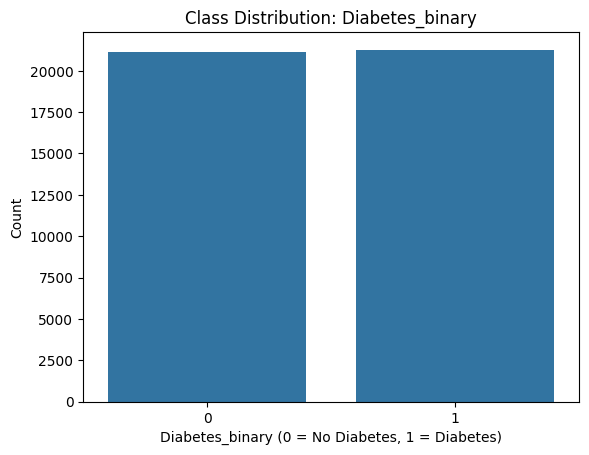

In [6]:
# Class distribution
sns.countplot(x='Diabetes_binary', data=df)
plt.title('Class Distribution: Diabetes_binary')
plt.xlabel('Diabetes_binary (0 = No Diabetes, 1 = Diabetes)')
plt.ylabel('Count')
plt.show()

### Feature Distributions

Histograms for all features are drawn to visualize the distribution of features. This will aid in the identification of skew, outliers and possible transformations for continous variables.

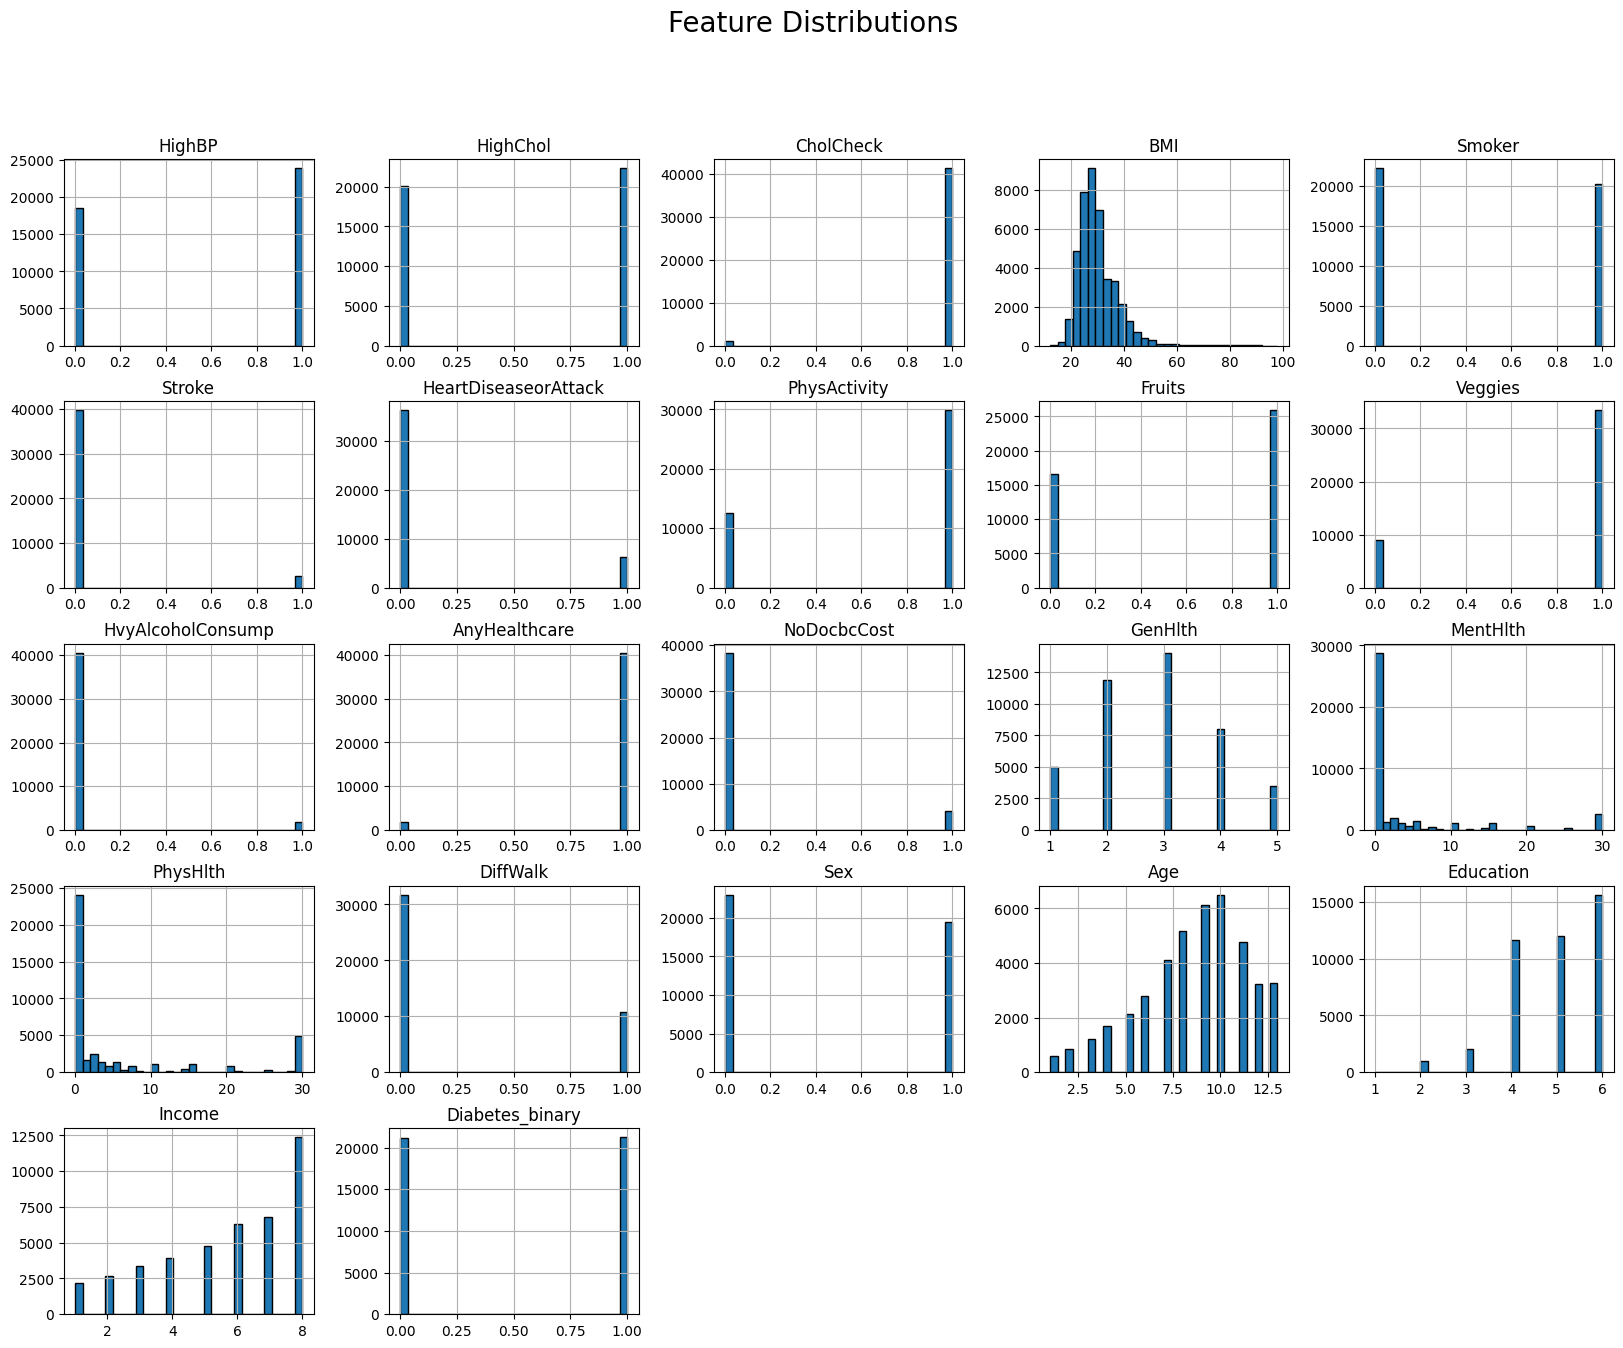

In [7]:
# Plot histograms for all features to observe distributions
df.hist(bins=30, figsize=(20, 15), edgecolor='black')
plt.suptitle('Feature Distributions', fontsize=20)
plt.show()

In [8]:
# Summary statistics
print("Summary Statistics:")
df.describe()

Summary Statistics:


,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
count,42415.000000,42415.000000,42415.000000,42415.000000,42415.000000,42415.000000,42415.000000,42415.000000,42415.000000,42415.000000,...,42415.00000,42415.000000,42415.000000,42415.000000,42415.000000,42415.000000,42415.000000,42415.000000,42415.000000,42415.000000
mean,0.563409,0.526087,0.975362,29.871107,0.477001,0.063091,0.146835,0.703336,0.610185,0.787905,...,0.09433,2.838642,3.761334,5.815207,0.251633,0.457951,8.578616,4.924579,5.700413,0.501662
std,0.495969,0.499325,0.155020,7.127473,0.499477,0.243129,0.353945,0.456792,0.487714,0.408796,...,0.29229,1.113260,8.159571,10.091111,0.433956,0.498235,2.853703,1.026316,2.173403,0.500003
min,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.00000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000,0.000000
50%,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.00000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000,1.000000
75%,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.00000,4.000000,2.000000,5.000000,1.000000,1.000000,11.000000,6.000000,8.000000,1.000000
max,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000,1.000000


### Correlation Matrix

A correlations heatmap among predictors can help identify multicollinearity and relationships.

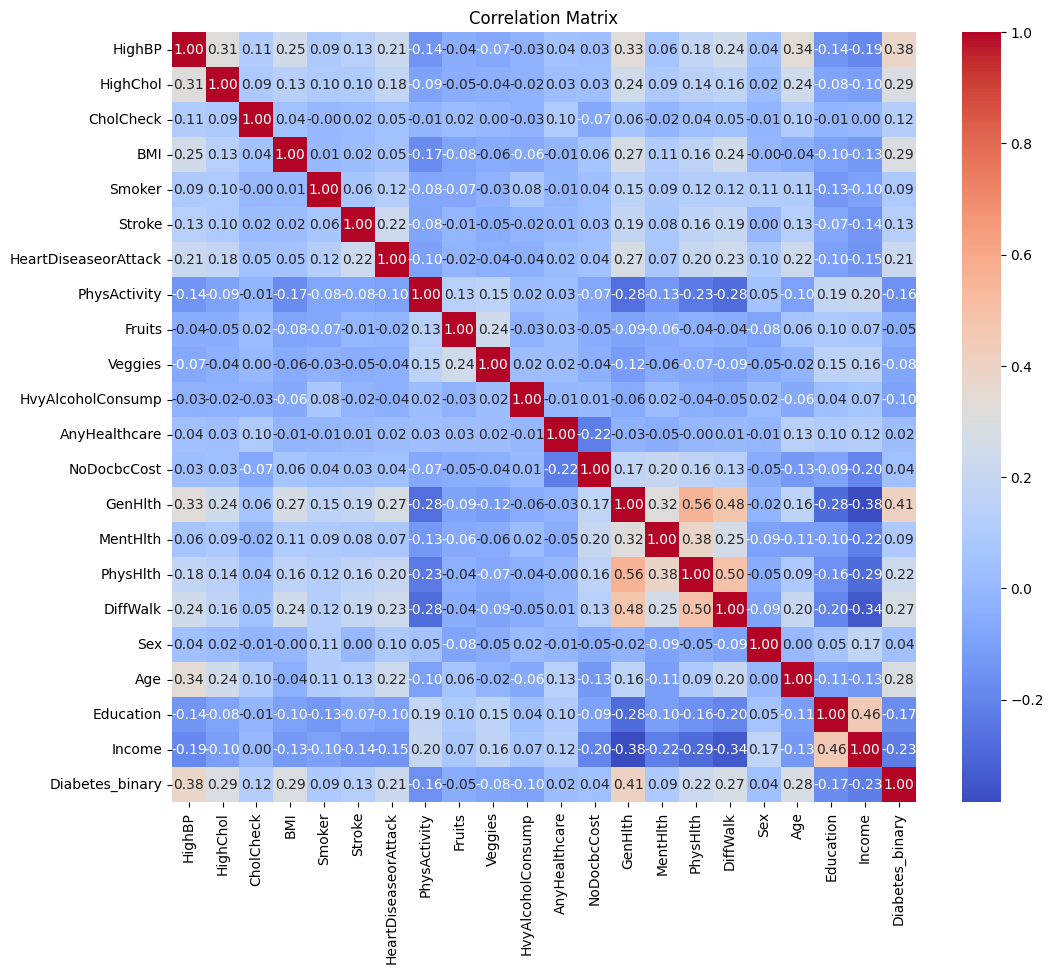

In [9]:
# Correlation heatmap
plt.figure(figsize=(12,10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Outlier Analysis

Outliers in the three continuous features (BMI, MentHlth, PhysHlth) are checked using boxplots and the IQR method.

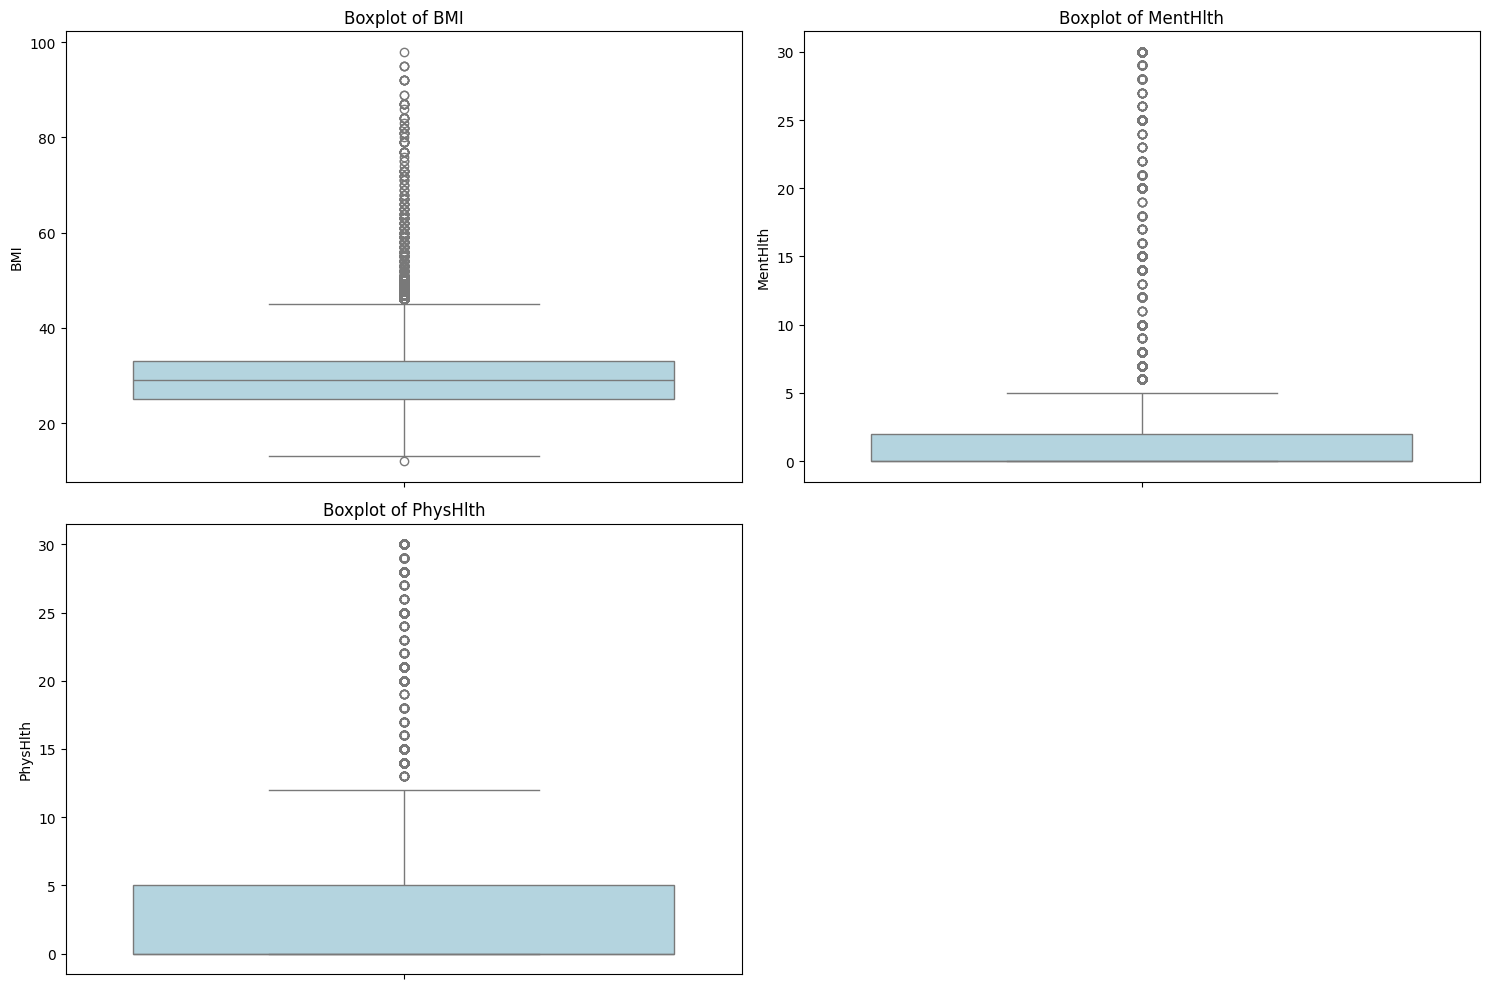

In [10]:
# Continuous features to check for outliers
continuous_features = ['BMI', 'MentHlth', 'PhysHlth']

# Plot boxplots for continuous features to check for outliers
plt.figure(figsize=(15, 10))
for i, feature in enumerate(continuous_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[feature], color="lightblue")
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

BMI: approximately 3 percent of the data points are greater than 45. These might be people with high BMIs (possible but rare).

MentHlth and PhysHlth: Large percentage of values greater than 5 (MentHlth) and 12.5 (PhysHlth) have outliers (17–19%). As this is a count of days with poor mental or physical health, higher values (e.g., 30 days) may represent actual cases instead of errors.

In [11]:
# Calculate IQR and detect outliers
outlier_summary = {}
for feature in continuous_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    outlier_percentage = (len(outliers) / len(df)) * 100
    outlier_summary[feature] = {
        "lower_bound": lower_bound,
        "upper_bound": upper_bound,
        "outlier_count": len(outliers),
        "outlier_percentage": round(outlier_percentage, 2)
    }

print("Outlier Summary:")
for feature, stats in outlier_summary.items():
    print(f"{feature}:")
    for stat, value in stats.items():
        print(f"  {stat}: {value}")

Outlier Summary:
BMI:
  lower_bound: 13.0
  upper_bound: 45.0
  outlier_count: 1308
  outlier_percentage: 3.08
MentHlth:
  lower_bound: -3.0
  upper_bound: 5.0
  outlier_count: 7105
  outlier_percentage: 16.75
PhysHlth:
  lower_bound: -7.5
  upper_bound: 12.5
  outlier_count: 8058
  outlier_percentage: 19.0


Outliers are not removed because:

* The outliers are probably valid health records especially in medical databases.

* Excluding them may be biased or lose meaningful patterns in the diabetes prediction.

* Neural network in general is not sensitive to mild outliers as long as the data is properly scaled.

### Data Preprocessing

MinMaxScaler is used to scale continuous features to the range [0, 1]. This is preferred because:

* Neural networks perform better when inputs are normalized to a fixed range.

* Activation functions are relatively effective with input values of 0 and 1.

`Age`, `Income`, `Education` and `GenHlth` are ordinal features. We normalize the value of these features within the range [0,1] using MinMax scaling to align size of variation of different features during the training of the neural network.

This approach:
* Tries to preserve the ordinal relationship while not assuming that the intervals between levels are equal.
* Keeps all input features on same level to get faster convergence.
* Prevents waste of dimension and information loss of one-hot encoding.

Therefore, `Age`, `Income`, `Education`, `GenHlth` and other continuous features are all normalized to ensure a successful training of the model.

In [12]:
from sklearn.preprocessing import MinMaxScaler

# Features to scale (continuous + ordinal)
features_to_scale = ['BMI', 'MentHlth', 'PhysHlth', 'Age', 'Income', 'Education', 'GenHlth']

# Apply MinMaxScaler
scaler = MinMaxScaler()
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

# Preview scaled data
df.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
0,1,0,1,0.360465,0,0,0,0,0,1,...,0,0.25,0.033333,0.000000,0,0,0.750000,1.0,0.857143,1
1,1,1,1,0.197674,1,0,1,1,1,1,...,0,0.50,0.000000,0.033333,0,1,0.916667,0.6,0.571429,0
2,1,1,1,0.162791,0,0,0,1,1,0,...,0,0.75,1.000000,1.000000,1,1,1.000000,0.6,0.285714,1
3,1,1,1,0.220930,0,0,0,0,0,1,...,0,0.50,0.000000,0.000000,1,1,0.750000,1.0,0.714286,1
4,1,1,1,0.197674,1,0,1,0,0,0,...,0,0.25,0.000000,0.000000,0,0,0.583333,0.6,1.000000,1


# Model Exploration to Determine Network Topology

In this section, eight different artificial neural network (ANN) architectures are developed and evaluated to determine the most suitable network topology for predicting diabetes. This process explores varying:
- Number of hidden layers
- Number of neurons per layer
- Activation functions
- Dropout rates for regularization

The rationale is to identify a topology that balances model complexity with generalization ability. Simpler models may underfit, while overly complex ones risk overfitting.

Each model is trained on the scaled dataset, and performance is evaluated using accuracy and loss on the validation set. Visualizations of training and validation metrics are provided for comparison.

In [13]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

seed = 1
# fix random seed for reproducibility
np.random.seed(seed)
tf.random.set_seed(seed)

# Split data into features and target
X = df.drop('Diabetes_binary', axis=1)
y = df['Diabetes_binary']

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
def plot_history(history, title):
    plt.figure(figsize=(12, 4))
    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


Models are defined ranging from shallow to deep, experimenting with:
* Layers: 1–3 hidden layers
* Neurons: 8–128 per layer
* Activations: ReLU, sigmoid, TanH
* Dropout: None to 0.5

For initial model exploration, a baseline configuration of **30 epochs** and a **batch size of 32** was selected.

* **Epochs (30):**  This duration allows the models to learn meaningful patterns without excessive training time. Overfitting is not a major concern at this stage because we are only comparing topologies. For later hyperparameter optimization, we will experiment with larger epoch values and apply early stopping.

* **Batch Size (32):**  A batch size of 32 is a commonly recommended default in deep learning as it provides a balance between:
  * Efficient use of memory.
  * Sufficient gradient updates for stable convergence.
  * Reasonable training speed.
  
This choice serves as a starting point for topology evaluation and will be refined in subsequent sections.

In [15]:
# Common parameters
input_dim = X_train.shape[1]
epochs = 30
batch_size = 32

def build_model_1():
    model = Sequential([
        Dense(16, input_dim=input_dim, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model

def build_model_2():
    model = Sequential([
        Dense(32, input_dim=input_dim, activation='relu'),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model

def build_model_3():
    model = Sequential([
        Dense(64, input_dim=input_dim, activation='relu'),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model

def build_model_4():
    model = Sequential([
        Dense(128, input_dim=input_dim, activation='relu'),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model

def build_model_5():
    model = Sequential([
        Dense(64, input_dim=input_dim, activation='relu'),
        Dropout(0.5),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model

def build_model_6():
    model = Sequential([
        Dense(32, input_dim=input_dim, activation='tanh'),
        Dense(16, activation='tanh'),
        Dense(1, activation='sigmoid')
    ])
    return model

def build_model_7():
    model = Sequential([
        Dense(16, input_dim=input_dim, activation='relu'),
        Dense(8, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model

def build_model_8():
    model = Sequential([
        Dense(128, input_dim=input_dim, activation='relu'),
        Dropout(0.4),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Training Model 1
Epoch 1/30
849/849 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.6901 - loss: 0.5876 - val_accuracy: 0.7237 - val_loss: 0.5485
Epoch 2/30
849/849 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7330 - loss: 0.5377 - val_accuracy: 0.7286 - val_loss: 0.5420
Epoch 3/30
849/849 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7357 - loss: 0.5315 - val_accuracy: 0.7290 - val_loss: 0.5371
Epoch 4/30
849/849 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7380 - loss: 0.5268 - val_accuracy: 0.7299 - val_loss: 0.5331
Epoch 5/30
849/849 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7388 - loss: 0.5233 - val_accuracy: 0.7305 - val_loss: 0.5305
Epoch 6/30
849/849 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7411 - loss: 0.5207 - val_accuracy: 0.7323 - val_loss: 0.5283
Epoch 7/30
849/849 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7421 - loss: 0.5187 - val_accuracy: 0.7330 - val_loss: 0.5265
Epoch 8/30
849/849 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7428 - loss: 0.5171

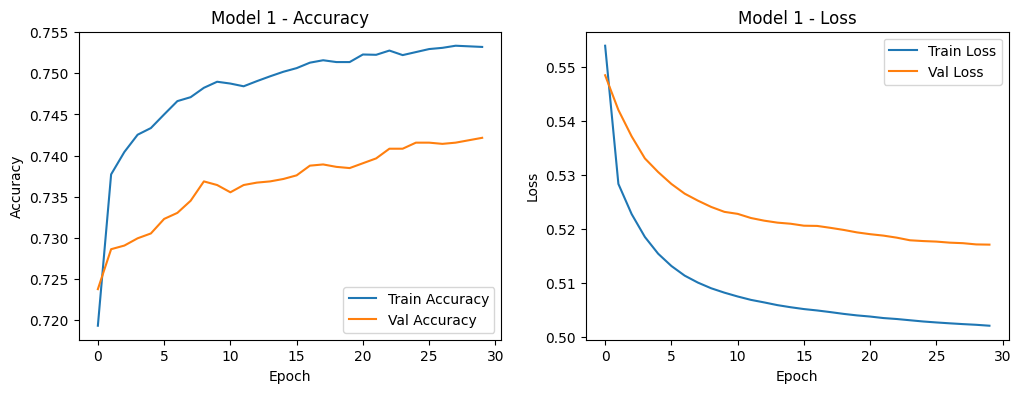

Model 1 Test Accuracy: 0.7546

Training Model 2
Epoch 1/30
849/849 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7027 - loss: 0.5797 - val_accuracy: 0.7208 - val_loss: 0.5477
Epoch 2/30
849/849 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7348 - loss: 0.5326 - val_accuracy: 0.7276 - val_loss: 0.5382
Epoch 3/30
849/849 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7381 - loss: 0.5243 - val_accuracy: 0.7320 - val_loss: 0.5324
Epoch 4/30
849/849 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7423 - loss: 0.5195 - val_accuracy: 0.7323 - val_loss: 0.5293
Epoch 5/30
849/849 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7435 - loss: 0.5167 - val_accuracy: 0.7323 - val_loss: 0.5279
Epoch 6/30
849/849 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7449 - loss: 0.5148 - val_accuracy: 0.7343 - val_loss: 0.5266
Epoch 7/30
849/849 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7454 - loss: 0.5134 - val_accuracy: 0.7351 - val_loss: 0.5256
Epoch 8/30
849/849 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - ac

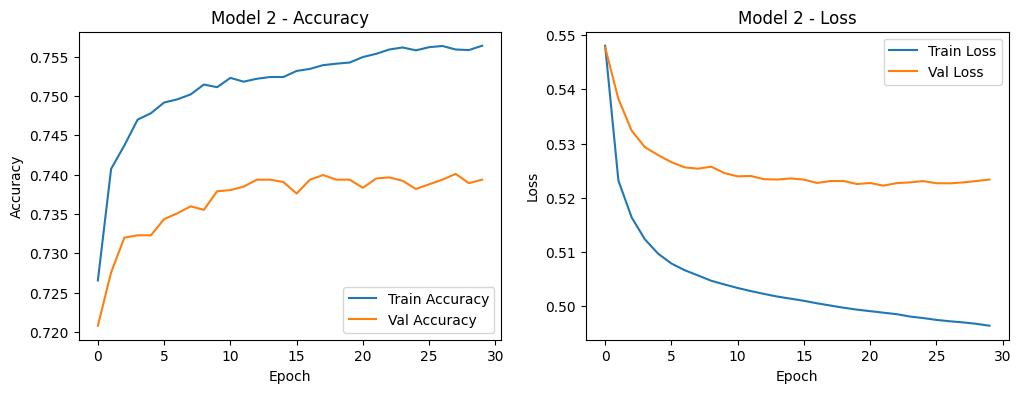

Model 2 Test Accuracy: 0.7497

Training Model 3
Epoch 1/30
849/849 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6968 - loss: 0.5755 - val_accuracy: 0.7290 - val_loss: 0.5398
Epoch 2/30
849/849 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7363 - loss: 0.5285 - val_accuracy: 0.7355 - val_loss: 0.5323
Epoch 3/30
849/849 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7418 - loss: 0.5217 - val_accuracy: 0.7357 - val_loss: 0.5282
Epoch 4/30
849/849 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7434 - loss: 0.5179 - val_accuracy: 0.7370 - val_loss: 0.5262
Epoch 5/30
849/849 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7453 - loss: 0.5154 - val_accuracy: 0.7363 - val_loss: 0.5256
Epoch 6/30
849/849 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7459 - loss: 0.5138 - val_accuracy: 0.7380 - val_loss: 0.5250
Epoch 7/30
849/849 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7460 - loss: 0.5123 - val_accuracy: 0.7370 - val_loss: 0.5247
Epoch 8/30
849/849 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - ac

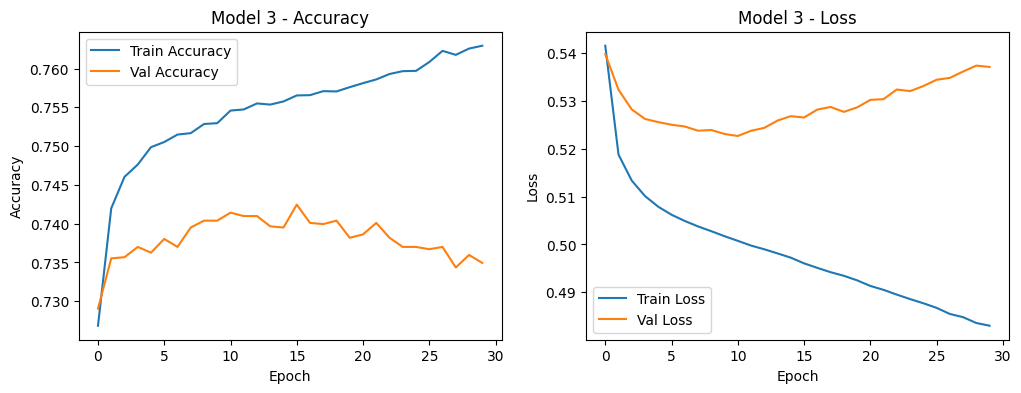

Model 3 Test Accuracy: 0.7458

Training Model 4
Epoch 1/30
849/849 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6909 - loss: 0.5810 - val_accuracy: 0.7305 - val_loss: 0.5390
Epoch 2/30
849/849 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7361 - loss: 0.5342 - val_accuracy: 0.7323 - val_loss: 0.5370
Epoch 3/30
849/849 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7351 - loss: 0.5258 - val_accuracy: 0.7310 - val_loss: 0.5339
Epoch 4/30
849/849 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7400 - loss: 0.5230 - val_accuracy: 0.7361 - val_loss: 0.5291
Epoch 5/30
849/849 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7410 - loss: 0.5199 - val_accuracy: 0.7333 - val_loss: 0.5314
Epoch 6/30
849/849 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7422 - loss: 0.5185 - val_accuracy: 0.7383 - val_loss: 0.5244
Epoch 7/30
849/849 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7422 - loss: 0.5173 - val_accuracy: 0.7370 - val_loss: 0.5265
Epoch 8/30
849/849 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - ac

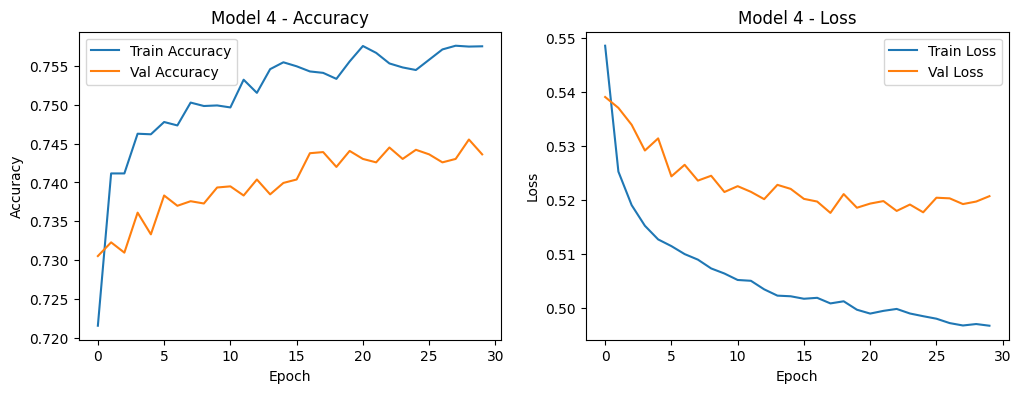

Model 4 Test Accuracy: 0.7522

Training Model 5
Epoch 1/30
849/849 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6617 - loss: 0.6082 - val_accuracy: 0.7255 - val_loss: 0.5452
Epoch 2/30
849/849 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7236 - loss: 0.5499 - val_accuracy: 0.7321 - val_loss: 0.5397
Epoch 3/30
849/849 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7277 - loss: 0.5411 - val_accuracy: 0.7299 - val_loss: 0.5316
Epoch 4/30
849/849 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7312 - loss: 0.5348 - val_accuracy: 0.7323 - val_loss: 0.5334
Epoch 5/30
849/849 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7354 - loss: 0.5304 - val_accuracy: 0.7310 - val_loss: 0.5303
Epoch 6/30
849/849 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7338 - loss: 0.5272 - val_accuracy: 0.7352 - val_loss: 0.5280
Epoch 7/30
849/849 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7339 - loss: 0.5279 - val_accuracy: 0.7352 - val_loss: 0.5266
Epoch 8/30
849/849 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - ac

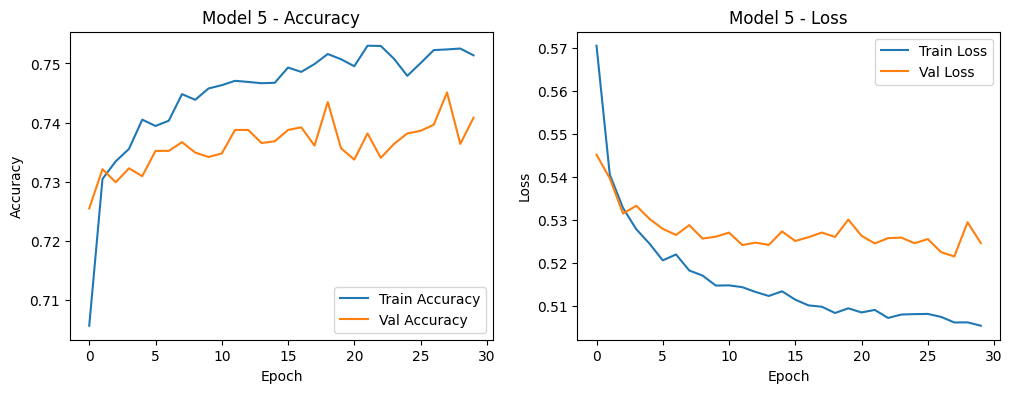

Model 5 Test Accuracy: 0.7491

Training Model 6
Epoch 1/30
849/849 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6914 - loss: 0.5810 - val_accuracy: 0.7211 - val_loss: 0.5499
Epoch 2/30
849/849 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7331 - loss: 0.5337 - val_accuracy: 0.7301 - val_loss: 0.5395
Epoch 3/30
849/849 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7378 - loss: 0.5254 - val_accuracy: 0.7333 - val_loss: 0.5338
Epoch 4/30
849/849 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7411 - loss: 0.5210 - val_accuracy: 0.7335 - val_loss: 0.5306
Epoch 5/30
849/849 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7453 - loss: 0.5184 - val_accuracy: 0.7348 - val_loss: 0.5286
Epoch 6/30
849/849 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7446 - loss: 0.5168 - val_accuracy: 0.7363 - val_loss: 0.5274
Epoch 7/30
849/849 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7446 - loss: 0.5157 - val_accuracy: 0.7367 - val_loss: 0.5265
Epoch 8/30
849/849 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - ac

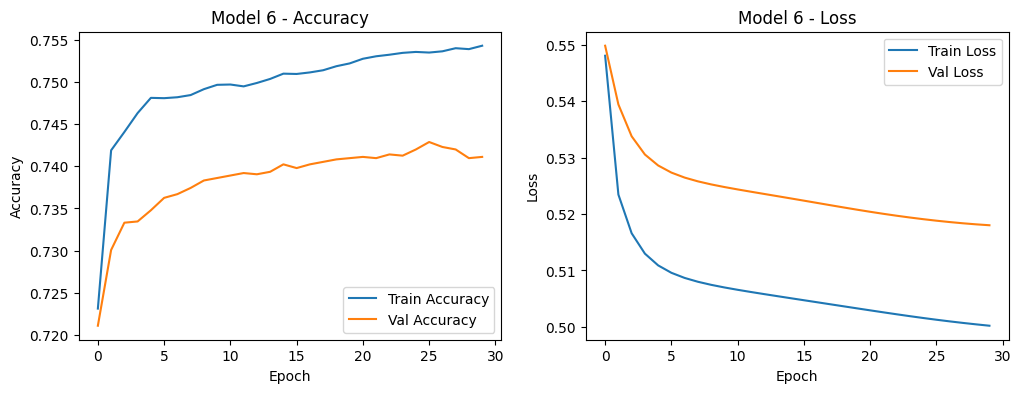

Model 6 Test Accuracy: 0.7497

Training Model 7
Epoch 1/30
849/849 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6427 - loss: 0.6167 - val_accuracy: 0.7237 - val_loss: 0.5455
Epoch 2/30
849/849 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7336 - loss: 0.5330 - val_accuracy: 0.7324 - val_loss: 0.5363
Epoch 3/30
849/849 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7388 - loss: 0.5245 - val_accuracy: 0.7317 - val_loss: 0.5324
Epoch 4/30
849/849 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7422 - loss: 0.5200 - val_accuracy: 0.7333 - val_loss: 0.5292
Epoch 5/30
849/849 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7450 - loss: 0.5172 - val_accuracy: 0.7343 - val_loss: 0.5270
Epoch 6/30
849/849 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7461 - loss: 0.5152 - val_accuracy: 0.7363 - val_loss: 0.5253
Epoch 7/30
849/849 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7470 - loss: 0.5137 - val_accuracy: 0.7367 - val_loss: 0.5245
Epoch 8/30
849/849 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - ac

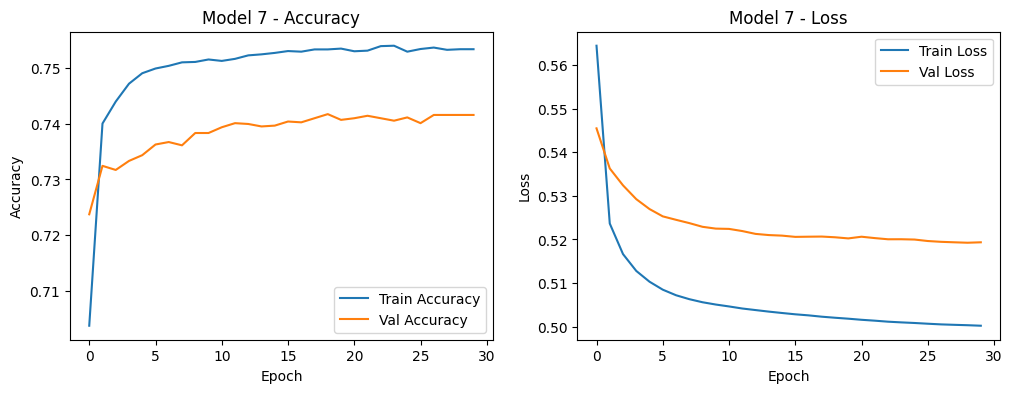

Model 7 Test Accuracy: 0.7521

Training Model 8
Epoch 1/30
849/849 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6891 - loss: 0.5922 - val_accuracy: 0.7296 - val_loss: 0.5435
Epoch 2/30
849/849 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7288 - loss: 0.5428 - val_accuracy: 0.7349 - val_loss: 0.5322
Epoch 3/30
849/849 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7342 - loss: 0.5356 - val_accuracy: 0.7345 - val_loss: 0.5297
Epoch 4/30
849/849 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7408 - loss: 0.5288 - val_accuracy: 0.7367 - val_loss: 0.5278
Epoch 5/30
849/849 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7401 - loss: 0.5252 - val_accuracy: 0.7382 - val_loss: 0.5249
Epoch 6/30
849/849 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7370 - loss: 0.5255 - val_accuracy: 0.7405 - val_loss: 0.5252
Epoch 7/30
849/849 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7405 - loss: 0.5225 - val_accuracy: 0.7398 - val_loss: 0.5235
Epoch 8/30
849/849 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - ac

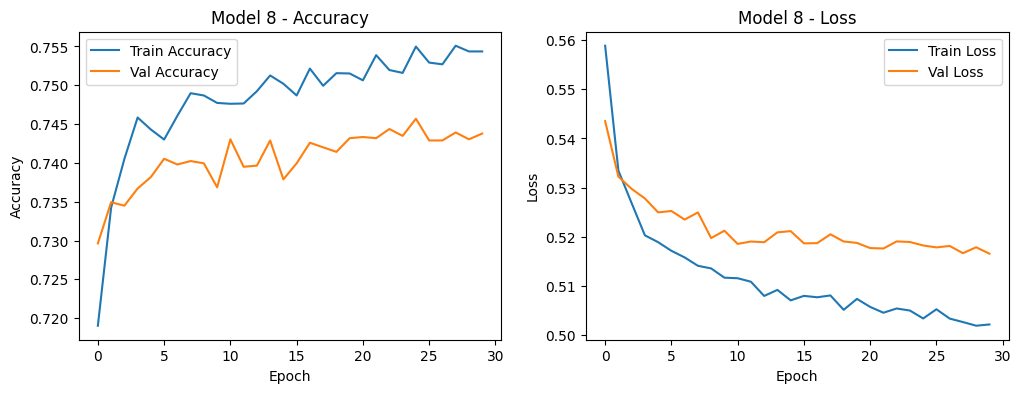

Model 8 Test Accuracy: 0.7522


In [16]:
models = [build_model_1(), build_model_2(), build_model_3(), build_model_4(),
          build_model_5(), build_model_6(), build_model_7(), build_model_8()]

for i, model in enumerate(models, 1):
    print(f"\nTraining Model {i}")
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, validation_split=0.2, epochs=epochs, batch_size=batch_size, verbose=1)
    plot_history(history, f"Model {i}")
    # Evaluate on test set
    _, test_acc = model.evaluate(X_test, y_test, verbose=0)
    print(f"Model {i} Test Accuracy: {test_acc:.4f}")

## Model Exploration Summary

The table below summarizes the performance of eight different neural network topologies designed for the diabetes prediction task. Models were evaluated based on validation accuracy (from training) and test accuracy (on held-out data).

| Model | Layers (#) | Neurons per Layer      | Activation(s)     | Dropout        | Val Accuracy (Best) | Test Accuracy |
|-------|------------|------------------------|--------------------|----------------|----------------------|---------------|
| 1     | 1          | [16]                   | ReLU → Sigmoid     | No             | 0.7422               | 0.7546        |
| 2     | 2          | [32, 16]               | ReLU → Sigmoid     | No             | 0.7401               | 0.7497        |
| 3     | 3          | [64, 32, 16]           | ReLU → Sigmoid     | No             | 0.7424               | 0.7458        |
| 4     | 2          | [128, 64]              | ReLU → Sigmoid     | Dropout (0.3)  | 0.7455               | 0.7522        |
| 5     | 3          | [64, 32, 16]           | ReLU → Sigmoid     | Dropout (0.5)  | 0.7451               | 0.7491        |
| 6     | 2          | [32, 16]               | Tanh → Sigmoid     | No             | 0.7429               | 0.7497        |
| 7     | 2          | [16, 8]                | ReLU → Sigmoid     | No             | 0.7417               | 0.7521        |
| 8     | 3          | [128, 64, 32]          | ReLU → Sigmoid     | Dropout (0.4, 0.3) | 0.7457            | 0.7522        |

The results indicate that all models achieve comparable validation and test accuracies.

Model 1 has the highest test accuracy makeing it the statistically best, although it is the simple model. Its excellent performance without dropout (no explicit regularization at all) indicates that the task may not need a very large model, or that its simplicity helps to naturally prevent overfitting.

Model 4 and 8 are also a strong contenders. They work almost as well as Model 1 but is more complex, as this suggests that the dropout successfully regularized it.On a larger or a more complex dataset, Models with dropouts might be more beneficial in the long run.

Of the eight neural network architectures, Model 1 was a choice for the best performing network for further optimization. It's easy to compute and reduce the time to train data, and is more efficient in predicting while maintaining robust results.

# Hyperparameter Investigation

In this section, we investigate key hyperparameters to optimize the selected model (Model 1). The goal is to enhance performance and generalization by systematically testing:

- **Batch Sizes:** 8 different values
- **Optimizers:** 3 options (Adam, SGD, RMSprop)
- **Regularization Techniques:** Dropout and L2 weight decay

Each configuration is evaluated using validation accuracy and loss. The investigation also considers training dynamics such as convergence speed and stability.

The hyperparameter search was previously aimed to cover 8 batch sizes from 8 ([8, 16, 32, 64, 128, 256, 512, 1024]), 20 epochs per configuration. Nonetheless, the runtime of this process was very long as the grid search space was big (3 regularizations × 3 optimizers × 8 batch sizes × 20 epochs).

In order to overcome this problem and reach a conclusion of the investigation on time and yet gaining some insights, the following modifications were applied:

* **Epochs: reduced from 20 to 10:** This divided the overall training time by two for each configuration and accumulating enough iterations to capture initial performance trends.
* **Adjusted batch sizes to begin at 32:** The smaller batch sizes (8, 16) are omitted to increase the speed of training, as higher batch sizes process more samples per step and also decrease the number of gradient updates per epoch. The new batch sizes tested were [32, 64, 128, 256, 512, 1024, 2048, 4096].

These changes reduced the grid-searching total runtime (72 configurations) quite a lot, allowing to efficiently search the main hyperparameters, but still testing with a diverse set of batch sizes and providing a representative figure of the obtained results.

In [17]:
# Define parameters
batch_sizes = [32, 64, 128, 256, 512, 1024, 2048, 4096]
optimizers = {
    'Adam': tf.keras.optimizers.Adam(learning_rate=0.001),
    'SGD': tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
    'RMSprop': tf.keras.optimizers.RMSprop(learning_rate=0.001)
}
regularizations = ['None', 'Dropout (0.3)', 'L2 (0.001)']

In [18]:
# Create fresh optimizer instance
def get_optimizer(name):
    if name == 'Adam':
        return tf.keras.optimizers.Adam(learning_rate=0.001)
    elif name == 'SGD':
        return tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
    elif name == 'RMSprop':
        return tf.keras.optimizers.RMSprop(learning_rate=0.001)
    else:
        raise ValueError("Unknown optimizer")

In [19]:
# Build Model 1 variants
from tensorflow.keras import regularizers

def build_model1(regularization_type=None):
    model = Sequential()
    if regularization_type == 'L2':
        model.add(Dense(16, input_dim=X_train.shape[1],
                        activation='relu',
                        kernel_regularizer=regularizers.l2(0.001)))
    else:
        model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))
    if regularization_type == 'Dropout':
        model.add(Dropout(0.3))
    model.add(Dense(1, activation='sigmoid'))
    return model

In [20]:
# Run Hyperparameter Experiments
tf.config.run_functions_eagerly(True)

# Store results
results = []

# Hyperparameter grid search
for reg in regularizations:
    print(f"\n=== Regularization: {reg} ===")
    for opt_name in optimizers:
        print(f"Optimizer: {opt_name}")
        for bs in batch_sizes:
            print(f"Batch Size: {bs}")

            # Clear previous model from memory
            tf.keras.backend.clear_session()

            # Build and compile model
            model = build_model1(regularization_type=reg if reg != 'None' else None)
            model.compile(optimizer=get_optimizer(opt_name),
                          loss='binary_crossentropy',
                          metrics=['accuracy'])

            # Train
            history = model.fit(X_train, y_train,
                                validation_split=0.2,
                                epochs=10,
                                batch_size=bs,
                                verbose=2)

            # Evaluate
            val_acc = max(history.history['val_accuracy'])
            _, test_acc = model.evaluate(X_test, y_test, verbose=0)

            # Save results
            results.append({
                'Regularization': reg,
                'Optimizer': opt_name,
                'Batch Size': bs,
                'Val Accuracy (Best)': round(val_acc, 4),
                'Test Accuracy': round(test_acc, 4)
            })


=== Regularization: None ===
Optimizer: Adam
Batch Size: 32
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.

849/849 - 40s - 48ms/step - accuracy: 0.6849 - loss: 0.5897 - val_accuracy: 0.7211 - val_loss: 0.5503
Epoch 2/10
849/849 - 40s - 47ms/step - accuracy: 0.7355 - loss: 0.5323 - val_accuracy: 0.7280 - val_loss: 0.5400
Epoch 3/10
849/849 - 40s - 47ms/step - accuracy: 0.7411 - loss: 0.5238 - val_accuracy: 0.7299 - val_loss: 0.5350
Epoch 4/10
849/849 - 41s - 48ms/step - accuracy: 0.7429 - loss: 0.5190 - val_accuracy: 0.7326 - val_loss: 0.5313
Epoch 5/10
849/849 - 41s - 48ms/step - accuracy: 0.7453 - loss: 0.5156 - val_accuracy: 0.7343 - val_loss: 0.5283
Epoch 6/10
849/849 - 41s - 48ms/step - accuracy: 0.7462 - loss: 0.5131 - val_accuracy: 0.7358 - val_loss: 0.5262
Epoch 7/10
849/849 - 40s - 47ms/step - accuracy: 0.7475 - loss: 0.5111 - val_accuracy: 0.7395 - val_loss: 0.5243
Epoch 8/10
849/849 - 41s - 48ms/step - accuracy: 0.7480 - loss: 0.5095 - val_accuracy: 0.7402 - val_loss: 0.5229
Epoch 9/10
849/849 - 41s - 49ms/step - accuracy: 0.7485 - loss: 0.5083 - val_accuracy: 0.7404 - val_loss: 0

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Batch Size: 64
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.

425/425 - 20s - 46ms/step - accuracy: 0.7050 - loss: 0.5765 - val_accuracy: 0.7196 - val_loss: 0.5569
Epoch 2/10
425/425 - 21s - 49ms/step - accuracy: 0.7304 - loss: 0.5408 - val_accuracy: 0.7246 - val_loss: 0.5468
Epoch 3/10
425/425 - 42s - 98ms/step - accuracy: 0.7346 - loss: 0.5323 - val_accuracy: 0.7276 - val_loss: 0.5412
Epoch 4/10
425/425 - 41s - 96ms/step - accuracy: 0.7383 - loss: 0.5268 - val_accuracy: 0.7302 - val_loss: 0.5370
Epoch 5/10
425/425 - 20s - 48ms/step - accuracy: 0.7401 - loss: 0.5229 - val_accuracy: 0.7314 - val_loss: 0.5339
Epoch 6/10
425/425 - 20s - 47ms/step - accuracy: 0.7424 - loss: 0.5200 - val_accuracy: 0.7324 - val_loss: 0.5314
Epoch 7/10
425/425 - 21s - 49ms/step - accuracy: 0.7436 - loss: 0.5179 - val_accuracy: 0.7338 - val_loss: 0.5294
Epoch 8/10
425/425 - 21s - 48ms/step - accuracy: 0.7447 - loss: 0.5162 - val_accuracy: 0.7339 - val_loss: 0.5279
Epoch 9/10
425/425 - 40s - 94ms/step - accuracy: 0.7461 - loss: 0.5148 - val_accuracy: 0.7355 - val_loss: 0

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Batch Size: 128
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.

213/213 - 11s - 50ms/step - accuracy: 0.6381 - loss: 0.6385 - val_accuracy: 0.7075 - val_loss: 0.5802
Epoch 2/10
213/213 - 11s - 51ms/step - accuracy: 0.7188 - loss: 0.5603 - val_accuracy: 0.7193 - val_loss: 0.5595
Epoch 3/10
213/213 - 19s - 90ms/step - accuracy: 0.7272 - loss: 0.5453 - val_accuracy: 0.7262 - val_loss: 0.5511
Epoch 4/10
213/213 - 10s - 49ms/step - accuracy: 0.7321 - loss: 0.5374 - val_accuracy: 0.7273 - val_loss: 0.5459
Epoch 5/10
213/213 - 21s - 98ms/step - accuracy: 0.7349 - loss: 0.5322 - val_accuracy: 0.7296 - val_loss: 0.5425
Epoch 6/10
213/213 - 11s - 50ms/step - accuracy: 0.7377 - loss: 0.5285 - val_accuracy: 0.7307 - val_loss: 0.5400
Epoch 7/10
213/213 - 10s - 46ms/step - accuracy: 0.7391 - loss: 0.5258 - val_accuracy: 0.7313 - val_loss: 0.5381
Epoch 8/10
213/213 - 11s - 50ms/step - accuracy: 0.7404 - loss: 0.5236 - val_accuracy: 0.7336 - val_loss: 0.5361
Epoch 9/10
213/213 - 21s - 98ms/step - accuracy: 0.7407 - loss: 0.5216 - val_accuracy: 0.7332 - val_loss: 0

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Batch Size: 256
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.

107/107 - 5s - 46ms/step - accuracy: 0.5880 - loss: 0.6708 - val_accuracy: 0.6859 - val_loss: 0.6145
Epoch 2/10
107/107 - 6s - 56ms/step - accuracy: 0.7038 - loss: 0.5818 - val_accuracy: 0.7111 - val_loss: 0.5667
Epoch 3/10
107/107 - 9s - 85ms/step - accuracy: 0.7216 - loss: 0.5519 - val_accuracy: 0.7214 - val_loss: 0.5530
Epoch 4/10
107/107 - 6s - 52ms/step - accuracy: 0.7296 - loss: 0.5407 - val_accuracy: 0.7252 - val_loss: 0.5470
Epoch 5/10
107/107 - 11s - 102ms/step - accuracy: 0.7341 - loss: 0.5348 - val_accuracy: 0.7259 - val_loss: 0.5434
Epoch 6/10
107/107 - 9s - 83ms/step - accuracy: 0.7359 - loss: 0.5308 - val_accuracy: 0.7257 - val_loss: 0.5408
Epoch 7/10
107/107 - 6s - 56ms/step - accuracy: 0.7369 - loss: 0.5276 - val_accuracy: 0.7279 - val_loss: 0.5386
Epoch 8/10
107/107 - 5s - 47ms/step - accuracy: 0.7390 - loss: 0.5250 - val_accuracy: 0.7302 - val_loss: 0.5367
Epoch 9/10
107/107 - 6s - 58ms/step - accuracy: 0.7404 - loss: 0.5228 - val_accuracy: 0.7320 - val_loss: 0.5351
E

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Batch Size: 512
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.

54/54 - 3s - 49ms/step - accuracy: 0.5437 - loss: 0.7073 - val_accuracy: 0.5907 - val_loss: 0.6683
Epoch 2/10
54/54 - 5s - 93ms/step - accuracy: 0.6494 - loss: 0.6435 - val_accuracy: 0.6817 - val_loss: 0.6246
Epoch 3/10
54/54 - 5s - 100ms/step - accuracy: 0.6960 - loss: 0.6029 - val_accuracy: 0.7036 - val_loss: 0.5906
Epoch 4/10
54/54 - 3s - 47ms/step - accuracy: 0.7109 - loss: 0.5754 - val_accuracy: 0.7091 - val_loss: 0.5724
Epoch 5/10
54/54 - 3s - 48ms/step - accuracy: 0.7187 - loss: 0.5605 - val_accuracy: 0.7161 - val_loss: 0.5628
Epoch 6/10
54/54 - 6s - 118ms/step - accuracy: 0.7237 - loss: 0.5520 - val_accuracy: 0.7212 - val_loss: 0.5570
Epoch 7/10
54/54 - 4s - 72ms/step - accuracy: 0.7272 - loss: 0.5464 - val_accuracy: 0.7236 - val_loss: 0.5531
Epoch 8/10
54/54 - 3s - 48ms/step - accuracy: 0.7286 - loss: 0.5423 - val_accuracy: 0.7246 - val_loss: 0.5501
Epoch 9/10
54/54 - 3s - 48ms/step - accuracy: 0.7304 - loss: 0.5390 - val_accuracy: 0.7249 - val_loss: 0.5475
Epoch 10/10
54/54 -

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Batch Size: 1024
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.

27/27 - 1s - 55ms/step - accuracy: 0.5724 - loss: 0.6811 - val_accuracy: 0.6342 - val_loss: 0.6526
Epoch 2/10


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


27/27 - 1s - 49ms/step - accuracy: 0.6600 - loss: 0.6344 - val_accuracy: 0.6847 - val_loss: 0.6208
Epoch 3/10
27/27 - 1s - 49ms/step - accuracy: 0.6930 - loss: 0.6055 - val_accuracy: 0.7028 - val_loss: 0.5974
Epoch 4/10
27/27 - 3s - 119ms/step - accuracy: 0.7062 - loss: 0.5836 - val_accuracy: 0.7089 - val_loss: 0.5801
Epoch 5/10
27/27 - 2s - 81ms/step - accuracy: 0.7156 - loss: 0.5666 - val_accuracy: 0.7142 - val_loss: 0.5674
Epoch 6/10
27/27 - 2s - 84ms/step - accuracy: 0.7202 - loss: 0.5552 - val_accuracy: 0.7195 - val_loss: 0.5600
Epoch 7/10
27/27 - 3s - 94ms/step - accuracy: 0.7231 - loss: 0.5484 - val_accuracy: 0.7196 - val_loss: 0.5558
Epoch 8/10
27/27 - 1s - 50ms/step - accuracy: 0.7248 - loss: 0.5441 - val_accuracy: 0.7203 - val_loss: 0.5530
Epoch 9/10
27/27 - 1s - 48ms/step - accuracy: 0.7282 - loss: 0.5412 - val_accuracy: 0.7202 - val_loss: 0.5509
Epoch 10/10
27/27 - 1s - 51ms/step - accuracy: 0.7299 - loss: 0.5389 - val_accuracy: 0.7220 - val_loss: 0.5492


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Batch Size: 2048
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.

14/14 - 1s - 70ms/step - accuracy: 0.4981 - loss: 0.7570 - val_accuracy: 0.5108 - val_loss: 0.7165
Epoch 2/10


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


14/14 - 1s - 74ms/step - accuracy: 0.5335 - loss: 0.6977 - val_accuracy: 0.5674 - val_loss: 0.6732
Epoch 3/10
14/14 - 1s - 94ms/step - accuracy: 0.5998 - loss: 0.6631 - val_accuracy: 0.6342 - val_loss: 0.6502
Epoch 4/10
14/14 - 1s - 59ms/step - accuracy: 0.6414 - loss: 0.6442 - val_accuracy: 0.6616 - val_loss: 0.6359
Epoch 5/10
14/14 - 1s - 85ms/step - accuracy: 0.6641 - loss: 0.6295 - val_accuracy: 0.6770 - val_loss: 0.6216
Epoch 6/10
14/14 - 1s - 90ms/step - accuracy: 0.6813 - loss: 0.6143 - val_accuracy: 0.6888 - val_loss: 0.6073
Epoch 7/10
14/14 - 1s - 88ms/step - accuracy: 0.6943 - loss: 0.5994 - val_accuracy: 0.6981 - val_loss: 0.5931
Epoch 8/10
14/14 - 2s - 112ms/step - accuracy: 0.7035 - loss: 0.5851 - val_accuracy: 0.7031 - val_loss: 0.5807
Epoch 9/10
14/14 - 1s - 102ms/step - accuracy: 0.7097 - loss: 0.5735 - val_accuracy: 0.7061 - val_loss: 0.5725
Epoch 10/10
14/14 - 1s - 57ms/step - accuracy: 0.7118 - loss: 0.5660 - val_accuracy: 0.7072 - val_loss: 0.5679


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Batch Size: 4096
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.

7/7 - 1s - 94ms/step - accuracy: 0.5351 - loss: 0.6920 - val_accuracy: 0.5343 - val_loss: 0.6894
Epoch 2/10


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


7/7 - 0s - 66ms/step - accuracy: 0.5589 - loss: 0.6837 - val_accuracy: 0.5708 - val_loss: 0.6815
Epoch 3/10
7/7 - 1s - 101ms/step - accuracy: 0.5926 - loss: 0.6759 - val_accuracy: 0.6072 - val_loss: 0.6740
Epoch 4/10
7/7 - 1s - 73ms/step - accuracy: 0.6276 - loss: 0.6683 - val_accuracy: 0.6324 - val_loss: 0.6668
Epoch 5/10
7/7 - 0s - 67ms/step - accuracy: 0.6490 - loss: 0.6609 - val_accuracy: 0.6442 - val_loss: 0.6597
Epoch 6/10
7/7 - 1s - 90ms/step - accuracy: 0.6609 - loss: 0.6537 - val_accuracy: 0.6518 - val_loss: 0.6528
Epoch 7/10
7/7 - 1s - 118ms/step - accuracy: 0.6670 - loss: 0.6467 - val_accuracy: 0.6660 - val_loss: 0.6460
Epoch 8/10
7/7 - 1s - 181ms/step - accuracy: 0.6777 - loss: 0.6398 - val_accuracy: 0.6766 - val_loss: 0.6390
Epoch 9/10
7/7 - 1s - 144ms/step - accuracy: 0.6907 - loss: 0.6325 - val_accuracy: 0.6865 - val_loss: 0.6314
Epoch 10/10
7/7 - 1s - 100ms/step - accuracy: 0.6974 - loss: 0.6245 - val_accuracy: 0.6928 - val_loss: 0.6235


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Optimizer: SGD
Batch Size: 32
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.

849/849 - 29s - 34ms/step - accuracy: 0.7168 - loss: 0.5552 - val_accuracy: 0.7223 - val_loss: 0.5476
Epoch 2/10
849/849 - 31s - 36ms/step - accuracy: 0.7389 - loss: 0.5269 - val_accuracy: 0.7261 - val_loss: 0.5416
Epoch 3/10
849/849 - 31s - 37ms/step - accuracy: 0.7430 - loss: 0.5206 - val_accuracy: 0.7290 - val_loss: 0.5384
Epoch 4/10
849/849 - 29s - 34ms/step - accuracy: 0.7439 - loss: 0.5172 - val_accuracy: 0.7327 - val_loss: 0.5348
Epoch 5/10
849/849 - 43s - 50ms/step - accuracy: 0.7456 - loss: 0.5150 - val_accuracy: 0.7330 - val_loss: 0.5309
Epoch 6/10
849/849 - 40s - 47ms/step - accuracy: 0.7454 - loss: 0.5134 - val_accuracy: 0.7339 - val_loss: 0.5309
Epoch 7/10
849/849 - 42s - 49ms/step - accuracy: 0.7472 - loss: 0.5122 - val_accuracy: 0.7342 - val_loss: 0.5291
Epoch 8/10
849/849 - 31s - 36ms/step - accuracy: 0.7479 - loss: 0.5113 - val_accuracy: 0.7342 - val_loss: 0.5288
Epoch 9/10
849/849 - 29s - 34ms/step - accuracy: 0.7481 - loss: 0.5106 - val_accuracy: 0.7345 - val_loss: 0

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Batch Size: 64
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.

425/425 - 16s - 37ms/step - accuracy: 0.7106 - loss: 0.5672 - val_accuracy: 0.7187 - val_loss: 0.5540
Epoch 2/10
425/425 - 20s - 46ms/step - accuracy: 0.7327 - loss: 0.5359 - val_accuracy: 0.7202 - val_loss: 0.5461
Epoch 3/10
425/425 - 15s - 36ms/step - accuracy: 0.7365 - loss: 0.5286 - val_accuracy: 0.7240 - val_loss: 0.5422
Epoch 4/10
425/425 - 23s - 55ms/step - accuracy: 0.7391 - loss: 0.5241 - val_accuracy: 0.7271 - val_loss: 0.5400
Epoch 5/10
425/425 - 18s - 42ms/step - accuracy: 0.7415 - loss: 0.5208 - val_accuracy: 0.7289 - val_loss: 0.5363
Epoch 6/10
425/425 - 20s - 46ms/step - accuracy: 0.7425 - loss: 0.5180 - val_accuracy: 0.7304 - val_loss: 0.5329
Epoch 7/10
425/425 - 20s - 48ms/step - accuracy: 0.7436 - loss: 0.5159 - val_accuracy: 0.7324 - val_loss: 0.5309
Epoch 8/10
425/425 - 24s - 57ms/step - accuracy: 0.7440 - loss: 0.5141 - val_accuracy: 0.7313 - val_loss: 0.5301
Epoch 9/10
425/425 - 15s - 34ms/step - accuracy: 0.7453 - loss: 0.5127 - val_accuracy: 0.7311 - val_loss: 0

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Batch Size: 128
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.

213/213 - 8s - 40ms/step - accuracy: 0.6885 - loss: 0.5910 - val_accuracy: 0.7215 - val_loss: 0.5577
Epoch 2/10
213/213 - 7s - 32ms/step - accuracy: 0.7272 - loss: 0.5441 - val_accuracy: 0.7257 - val_loss: 0.5476
Epoch 3/10
213/213 - 11s - 49ms/step - accuracy: 0.7323 - loss: 0.5349 - val_accuracy: 0.7273 - val_loss: 0.5426
Epoch 4/10
213/213 - 11s - 51ms/step - accuracy: 0.7360 - loss: 0.5295 - val_accuracy: 0.7282 - val_loss: 0.5390
Epoch 5/10
213/213 - 8s - 38ms/step - accuracy: 0.7383 - loss: 0.5256 - val_accuracy: 0.7299 - val_loss: 0.5366
Epoch 6/10
213/213 - 9s - 44ms/step - accuracy: 0.7399 - loss: 0.5227 - val_accuracy: 0.7310 - val_loss: 0.5346
Epoch 7/10
213/213 - 8s - 39ms/step - accuracy: 0.7418 - loss: 0.5205 - val_accuracy: 0.7315 - val_loss: 0.5327
Epoch 8/10
213/213 - 8s - 37ms/step - accuracy: 0.7430 - loss: 0.5186 - val_accuracy: 0.7324 - val_loss: 0.5312
Epoch 9/10
213/213 - 10s - 46ms/step - accuracy: 0.7434 - loss: 0.5170 - val_accuracy: 0.7332 - val_loss: 0.5299


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Batch Size: 256
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.

107/107 - 5s - 46ms/step - accuracy: 0.6768 - loss: 0.6069 - val_accuracy: 0.7161 - val_loss: 0.5693
Epoch 2/10
107/107 - 3s - 32ms/step - accuracy: 0.7207 - loss: 0.5562 - val_accuracy: 0.7183 - val_loss: 0.5594
Epoch 3/10
107/107 - 5s - 50ms/step - accuracy: 0.7268 - loss: 0.5471 - val_accuracy: 0.7227 - val_loss: 0.5538
Epoch 4/10
107/107 - 5s - 48ms/step - accuracy: 0.7304 - loss: 0.5412 - val_accuracy: 0.7279 - val_loss: 0.5498
Epoch 5/10
107/107 - 5s - 47ms/step - accuracy: 0.7330 - loss: 0.5368 - val_accuracy: 0.7287 - val_loss: 0.5468
Epoch 6/10
107/107 - 4s - 39ms/step - accuracy: 0.7346 - loss: 0.5333 - val_accuracy: 0.7280 - val_loss: 0.5444
Epoch 7/10
107/107 - 4s - 39ms/step - accuracy: 0.7365 - loss: 0.5305 - val_accuracy: 0.7298 - val_loss: 0.5424
Epoch 8/10
107/107 - 4s - 42ms/step - accuracy: 0.7386 - loss: 0.5281 - val_accuracy: 0.7311 - val_loss: 0.5408
Epoch 9/10
107/107 - 4s - 37ms/step - accuracy: 0.7391 - loss: 0.5261 - val_accuracy: 0.7323 - val_loss: 0.5394
Epo

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Batch Size: 512
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.

54/54 - 3s - 47ms/step - accuracy: 0.6463 - loss: 0.6349 - val_accuracy: 0.6963 - val_loss: 0.5885
Epoch 2/10
54/54 - 4s - 82ms/step - accuracy: 0.7098 - loss: 0.5683 - val_accuracy: 0.7065 - val_loss: 0.5673
Epoch 3/10
54/54 - 3s - 47ms/step - accuracy: 0.7174 - loss: 0.5545 - val_accuracy: 0.7155 - val_loss: 0.5601
Epoch 4/10
54/54 - 2s - 34ms/step - accuracy: 0.7226 - loss: 0.5478 - val_accuracy: 0.7189 - val_loss: 0.5557
Epoch 5/10
54/54 - 3s - 58ms/step - accuracy: 0.7262 - loss: 0.5432 - val_accuracy: 0.7215 - val_loss: 0.5527
Epoch 6/10
54/54 - 3s - 47ms/step - accuracy: 0.7286 - loss: 0.5398 - val_accuracy: 0.7226 - val_loss: 0.5506
Epoch 7/10
54/54 - 2s - 36ms/step - accuracy: 0.7310 - loss: 0.5372 - val_accuracy: 0.7242 - val_loss: 0.5489
Epoch 8/10
54/54 - 2s - 34ms/step - accuracy: 0.7331 - loss: 0.5350 - val_accuracy: 0.7254 - val_loss: 0.5476
Epoch 9/10
54/54 - 2s - 34ms/step - accuracy: 0.7342 - loss: 0.5333 - val_accuracy: 0.7254 - val_loss: 0.5464
Epoch 10/10
54/54 - 2

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Batch Size: 1024
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.

27/27 - 1s - 43ms/step - accuracy: 0.5371 - loss: 0.6915 - val_accuracy: 0.6140 - val_loss: 0.6623
Epoch 2/10


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


27/27 - 1s - 37ms/step - accuracy: 0.6539 - loss: 0.6417 - val_accuracy: 0.6698 - val_loss: 0.6266
Epoch 3/10
27/27 - 1s - 37ms/step - accuracy: 0.6864 - loss: 0.6109 - val_accuracy: 0.6832 - val_loss: 0.6037
Epoch 4/10
27/27 - 1s - 38ms/step - accuracy: 0.6972 - loss: 0.5914 - val_accuracy: 0.6921 - val_loss: 0.5908
Epoch 5/10
27/27 - 1s - 38ms/step - accuracy: 0.7042 - loss: 0.5803 - val_accuracy: 0.6982 - val_loss: 0.5838
Epoch 6/10
27/27 - 1s - 37ms/step - accuracy: 0.7082 - loss: 0.5738 - val_accuracy: 0.7034 - val_loss: 0.5792
Epoch 7/10
27/27 - 1s - 47ms/step - accuracy: 0.7104 - loss: 0.5691 - val_accuracy: 0.7072 - val_loss: 0.5755
Epoch 8/10
27/27 - 1s - 37ms/step - accuracy: 0.7132 - loss: 0.5652 - val_accuracy: 0.7106 - val_loss: 0.5723
Epoch 9/10
27/27 - 1s - 45ms/step - accuracy: 0.7163 - loss: 0.5618 - val_accuracy: 0.7145 - val_loss: 0.5694
Epoch 10/10
27/27 - 1s - 55ms/step - accuracy: 0.7183 - loss: 0.5588 - val_accuracy: 0.7150 - val_loss: 0.5668


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Batch Size: 2048
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.

14/14 - 1s - 57ms/step - accuracy: 0.5383 - loss: 0.6937 - val_accuracy: 0.5848 - val_loss: 0.6743
Epoch 2/10


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


14/14 - 1s - 44ms/step - accuracy: 0.5988 - loss: 0.6676 - val_accuracy: 0.6200 - val_loss: 0.6595
Epoch 3/10
14/14 - 1s - 48ms/step - accuracy: 0.6388 - loss: 0.6503 - val_accuracy: 0.6563 - val_loss: 0.6422
Epoch 4/10
14/14 - 1s - 46ms/step - accuracy: 0.6712 - loss: 0.6336 - val_accuracy: 0.6785 - val_loss: 0.6263
Epoch 5/10
14/14 - 1s - 42ms/step - accuracy: 0.6858 - loss: 0.6174 - val_accuracy: 0.6876 - val_loss: 0.6109
Epoch 6/10
14/14 - 1s - 47ms/step - accuracy: 0.6972 - loss: 0.6019 - val_accuracy: 0.6988 - val_loss: 0.5970
Epoch 7/10
14/14 - 1s - 89ms/step - accuracy: 0.7066 - loss: 0.5882 - val_accuracy: 0.7013 - val_loss: 0.5852
Epoch 8/10
14/14 - 1s - 64ms/step - accuracy: 0.7108 - loss: 0.5768 - val_accuracy: 0.7058 - val_loss: 0.5760
Epoch 9/10
14/14 - 1s - 61ms/step - accuracy: 0.7143 - loss: 0.5680 - val_accuracy: 0.7100 - val_loss: 0.5693
Epoch 10/10
14/14 - 1s - 107ms/step - accuracy: 0.7167 - loss: 0.5615 - val_accuracy: 0.7115 - val_loss: 0.5645


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Batch Size: 4096
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.

7/7 - 1s - 79ms/step - accuracy: 0.4992 - loss: 0.7670 - val_accuracy: 0.5076 - val_loss: 0.7274
Epoch 2/10


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


7/7 - 1s - 75ms/step - accuracy: 0.5292 - loss: 0.7067 - val_accuracy: 0.5541 - val_loss: 0.6852
Epoch 3/10
7/7 - 1s - 78ms/step - accuracy: 0.5707 - loss: 0.6792 - val_accuracy: 0.5945 - val_loss: 0.6711
Epoch 4/10
7/7 - 1s - 88ms/step - accuracy: 0.6097 - loss: 0.6654 - val_accuracy: 0.6399 - val_loss: 0.6559
Epoch 5/10
7/7 - 1s - 90ms/step - accuracy: 0.6520 - loss: 0.6502 - val_accuracy: 0.6731 - val_loss: 0.6421
Epoch 6/10
7/7 - 1s - 82ms/step - accuracy: 0.6700 - loss: 0.6383 - val_accuracy: 0.6782 - val_loss: 0.6323
Epoch 7/10
7/7 - 1s - 95ms/step - accuracy: 0.6785 - loss: 0.6289 - val_accuracy: 0.6887 - val_loss: 0.6231
Epoch 8/10
7/7 - 1s - 88ms/step - accuracy: 0.6872 - loss: 0.6195 - val_accuracy: 0.6940 - val_loss: 0.6140
Epoch 9/10
7/7 - 1s - 85ms/step - accuracy: 0.6945 - loss: 0.6105 - val_accuracy: 0.7006 - val_loss: 0.6059
Epoch 10/10
7/7 - 1s - 87ms/step - accuracy: 0.7003 - loss: 0.6022 - val_accuracy: 0.7053 - val_loss: 0.5983


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Optimizer: RMSprop
Batch Size: 32
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.

849/849 - 32s - 37ms/step - accuracy: 0.7156 - loss: 0.5573 - val_accuracy: 0.7255 - val_loss: 0.5477
Epoch 2/10
849/849 - 33s - 39ms/step - accuracy: 0.7344 - loss: 0.5325 - val_accuracy: 0.7298 - val_loss: 0.5409
Epoch 3/10
849/849 - 43s - 50ms/step - accuracy: 0.7381 - loss: 0.5255 - val_accuracy: 0.7301 - val_loss: 0.5357
Epoch 4/10
849/849 - 32s - 37ms/step - accuracy: 0.7409 - loss: 0.5209 - val_accuracy: 0.7302 - val_loss: 0.5320
Epoch 5/10
849/849 - 33s - 39ms/step - accuracy: 0.7436 - loss: 0.5176 - val_accuracy: 0.7326 - val_loss: 0.5292
Epoch 6/10
849/849 - 42s - 50ms/step - accuracy: 0.7449 - loss: 0.5151 - val_accuracy: 0.7341 - val_loss: 0.5274
Epoch 7/10
849/849 - 32s - 38ms/step - accuracy: 0.7463 - loss: 0.5131 - val_accuracy: 0.7360 - val_loss: 0.5251
Epoch 8/10
849/849 - 35s - 41ms/step - accuracy: 0.7471 - loss: 0.5114 - val_accuracy: 0.7357 - val_loss: 0.5239
Epoch 9/10
849/849 - 41s - 49ms/step - accuracy: 0.7482 - loss: 0.5101 - val_accuracy: 0.7379 - val_loss: 0

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Batch Size: 64
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.

425/425 - 16s - 38ms/step - accuracy: 0.6954 - loss: 0.5869 - val_accuracy: 0.7184 - val_loss: 0.5575
Epoch 2/10
425/425 - 17s - 40ms/step - accuracy: 0.7329 - loss: 0.5397 - val_accuracy: 0.7282 - val_loss: 0.5456
Epoch 3/10
425/425 - 20s - 48ms/step - accuracy: 0.7376 - loss: 0.5296 - val_accuracy: 0.7299 - val_loss: 0.5396
Epoch 4/10
425/425 - 20s - 48ms/step - accuracy: 0.7414 - loss: 0.5243 - val_accuracy: 0.7327 - val_loss: 0.5357
Epoch 5/10
425/425 - 17s - 40ms/step - accuracy: 0.7430 - loss: 0.5207 - val_accuracy: 0.7336 - val_loss: 0.5331
Epoch 6/10
425/425 - 20s - 47ms/step - accuracy: 0.7450 - loss: 0.5181 - val_accuracy: 0.7343 - val_loss: 0.5307
Epoch 7/10
425/425 - 17s - 40ms/step - accuracy: 0.7469 - loss: 0.5158 - val_accuracy: 0.7366 - val_loss: 0.5285
Epoch 8/10
425/425 - 16s - 38ms/step - accuracy: 0.7474 - loss: 0.5140 - val_accuracy: 0.7385 - val_loss: 0.5267
Epoch 9/10
425/425 - 21s - 49ms/step - accuracy: 0.7471 - loss: 0.5126 - val_accuracy: 0.7389 - val_loss: 0

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Batch Size: 128
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.

213/213 - 9s - 41ms/step - accuracy: 0.6593 - loss: 0.6202 - val_accuracy: 0.7177 - val_loss: 0.5702
Epoch 2/10
213/213 - 9s - 41ms/step - accuracy: 0.7264 - loss: 0.5509 - val_accuracy: 0.7242 - val_loss: 0.5544
Epoch 3/10
213/213 - 8s - 38ms/step - accuracy: 0.7325 - loss: 0.5397 - val_accuracy: 0.7273 - val_loss: 0.5479
Epoch 4/10
213/213 - 10s - 49ms/step - accuracy: 0.7351 - loss: 0.5337 - val_accuracy: 0.7285 - val_loss: 0.5437
Epoch 5/10
213/213 - 11s - 49ms/step - accuracy: 0.7369 - loss: 0.5297 - val_accuracy: 0.7298 - val_loss: 0.5408
Epoch 6/10
213/213 - 8s - 37ms/step - accuracy: 0.7391 - loss: 0.5267 - val_accuracy: 0.7308 - val_loss: 0.5386
Epoch 7/10
213/213 - 9s - 41ms/step - accuracy: 0.7407 - loss: 0.5244 - val_accuracy: 0.7311 - val_loss: 0.5369
Epoch 8/10
213/213 - 9s - 43ms/step - accuracy: 0.7415 - loss: 0.5227 - val_accuracy: 0.7308 - val_loss: 0.5355
Epoch 9/10
213/213 - 8s - 36ms/step - accuracy: 0.7417 - loss: 0.5212 - val_accuracy: 0.7311 - val_loss: 0.5342
E

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Batch Size: 256
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.

107/107 - 4s - 38ms/step - accuracy: 0.6804 - loss: 0.6065 - val_accuracy: 0.6999 - val_loss: 0.5786
Epoch 2/10
107/107 - 5s - 48ms/step - accuracy: 0.7136 - loss: 0.5612 - val_accuracy: 0.7122 - val_loss: 0.5607
Epoch 3/10
107/107 - 5s - 48ms/step - accuracy: 0.7230 - loss: 0.5483 - val_accuracy: 0.7161 - val_loss: 0.5532
Epoch 4/10
107/107 - 4s - 38ms/step - accuracy: 0.7278 - loss: 0.5413 - val_accuracy: 0.7212 - val_loss: 0.5485
Epoch 5/10
107/107 - 4s - 38ms/step - accuracy: 0.7307 - loss: 0.5364 - val_accuracy: 0.7231 - val_loss: 0.5451
Epoch 6/10
107/107 - 5s - 48ms/step - accuracy: 0.7330 - loss: 0.5327 - val_accuracy: 0.7248 - val_loss: 0.5426
Epoch 7/10
107/107 - 9s - 86ms/step - accuracy: 0.7349 - loss: 0.5298 - val_accuracy: 0.7258 - val_loss: 0.5405
Epoch 8/10
107/107 - 5s - 44ms/step - accuracy: 0.7361 - loss: 0.5275 - val_accuracy: 0.7264 - val_loss: 0.5389
Epoch 9/10
107/107 - 4s - 42ms/step - accuracy: 0.7373 - loss: 0.5255 - val_accuracy: 0.7279 - val_loss: 0.5374
Epo

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Batch Size: 512
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.

54/54 - 2s - 42ms/step - accuracy: 0.6336 - loss: 0.6470 - val_accuracy: 0.6926 - val_loss: 0.6193
Epoch 2/10
54/54 - 2s - 39ms/step - accuracy: 0.7145 - loss: 0.5948 - val_accuracy: 0.7158 - val_loss: 0.5820
Epoch 3/10
54/54 - 2s - 40ms/step - accuracy: 0.7232 - loss: 0.5651 - val_accuracy: 0.7209 - val_loss: 0.5646
Epoch 4/10
54/54 - 3s - 59ms/step - accuracy: 0.7251 - loss: 0.5517 - val_accuracy: 0.7230 - val_loss: 0.5574
Epoch 5/10
54/54 - 2s - 39ms/step - accuracy: 0.7283 - loss: 0.5452 - val_accuracy: 0.7239 - val_loss: 0.5537
Epoch 6/10
54/54 - 3s - 47ms/step - accuracy: 0.7313 - loss: 0.5412 - val_accuracy: 0.7262 - val_loss: 0.5510
Epoch 7/10
54/54 - 2s - 39ms/step - accuracy: 0.7330 - loss: 0.5381 - val_accuracy: 0.7285 - val_loss: 0.5489
Epoch 8/10
54/54 - 3s - 47ms/step - accuracy: 0.7341 - loss: 0.5356 - val_accuracy: 0.7290 - val_loss: 0.5470
Epoch 9/10
54/54 - 3s - 56ms/step - accuracy: 0.7343 - loss: 0.5335 - val_accuracy: 0.7289 - val_loss: 0.5454
Epoch 10/10
54/54 - 2

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Batch Size: 1024
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.

27/27 - 1s - 47ms/step - accuracy: 0.6108 - loss: 0.6601 - val_accuracy: 0.6589 - val_loss: 0.6333
Epoch 2/10


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


27/27 - 1s - 49ms/step - accuracy: 0.6820 - loss: 0.6147 - val_accuracy: 0.6928 - val_loss: 0.5989
Epoch 3/10
27/27 - 3s - 100ms/step - accuracy: 0.7074 - loss: 0.5842 - val_accuracy: 0.7084 - val_loss: 0.5771
Epoch 4/10
27/27 - 2s - 79ms/step - accuracy: 0.7166 - loss: 0.5658 - val_accuracy: 0.7145 - val_loss: 0.5655
Epoch 5/10
27/27 - 1s - 41ms/step - accuracy: 0.7225 - loss: 0.5552 - val_accuracy: 0.7203 - val_loss: 0.5588
Epoch 6/10
27/27 - 1s - 42ms/step - accuracy: 0.7256 - loss: 0.5485 - val_accuracy: 0.7223 - val_loss: 0.5543
Epoch 7/10
27/27 - 1s - 41ms/step - accuracy: 0.7275 - loss: 0.5438 - val_accuracy: 0.7234 - val_loss: 0.5511
Epoch 8/10
27/27 - 1s - 40ms/step - accuracy: 0.7295 - loss: 0.5402 - val_accuracy: 0.7237 - val_loss: 0.5485
Epoch 9/10
27/27 - 1s - 47ms/step - accuracy: 0.7313 - loss: 0.5374 - val_accuracy: 0.7251 - val_loss: 0.5464
Epoch 10/10
27/27 - 1s - 42ms/step - accuracy: 0.7328 - loss: 0.5351 - val_accuracy: 0.7265 - val_loss: 0.5447


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Batch Size: 2048
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.

14/14 - 1s - 61ms/step - accuracy: 0.4309 - loss: 0.7208 - val_accuracy: 0.4803 - val_loss: 0.7058
Epoch 2/10


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


14/14 - 1s - 77ms/step - accuracy: 0.5210 - loss: 0.6951 - val_accuracy: 0.5499 - val_loss: 0.6865
Epoch 3/10
14/14 - 1s - 91ms/step - accuracy: 0.5736 - loss: 0.6773 - val_accuracy: 0.5992 - val_loss: 0.6706
Epoch 4/10
14/14 - 1s - 90ms/step - accuracy: 0.6136 - loss: 0.6619 - val_accuracy: 0.6300 - val_loss: 0.6561
Epoch 5/10
14/14 - 1s - 88ms/step - accuracy: 0.6400 - loss: 0.6475 - val_accuracy: 0.6532 - val_loss: 0.6426
Epoch 6/10
14/14 - 1s - 51ms/step - accuracy: 0.6619 - loss: 0.6337 - val_accuracy: 0.6657 - val_loss: 0.6299
Epoch 7/10
14/14 - 1s - 51ms/step - accuracy: 0.6786 - loss: 0.6205 - val_accuracy: 0.6784 - val_loss: 0.6179
Epoch 8/10
14/14 - 1s - 103ms/step - accuracy: 0.6917 - loss: 0.6082 - val_accuracy: 0.6894 - val_loss: 0.6071
Epoch 9/10
14/14 - 1s - 67ms/step - accuracy: 0.7018 - loss: 0.5972 - val_accuracy: 0.6993 - val_loss: 0.5974
Epoch 10/10
14/14 - 1s - 68ms/step - accuracy: 0.7074 - loss: 0.5875 - val_accuracy: 0.7028 - val_loss: 0.5890


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Batch Size: 4096
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.

7/7 - 1s - 82ms/step - accuracy: 0.5023 - loss: 0.6976 - val_accuracy: 0.5438 - val_loss: 0.6873
Epoch 2/10


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


7/7 - 0s - 61ms/step - accuracy: 0.5662 - loss: 0.6828 - val_accuracy: 0.5860 - val_loss: 0.6764
Epoch 3/10
7/7 - 1s - 83ms/step - accuracy: 0.6039 - loss: 0.6725 - val_accuracy: 0.6119 - val_loss: 0.6672
Epoch 4/10
7/7 - 0s - 61ms/step - accuracy: 0.6279 - loss: 0.6633 - val_accuracy: 0.6263 - val_loss: 0.6588
Epoch 5/10
7/7 - 0s - 56ms/step - accuracy: 0.6434 - loss: 0.6548 - val_accuracy: 0.6456 - val_loss: 0.6507
Epoch 6/10
7/7 - 0s - 57ms/step - accuracy: 0.6569 - loss: 0.6466 - val_accuracy: 0.6586 - val_loss: 0.6429
Epoch 7/10
7/7 - 1s - 101ms/step - accuracy: 0.6677 - loss: 0.6386 - val_accuracy: 0.6695 - val_loss: 0.6352
Epoch 8/10
7/7 - 1s - 82ms/step - accuracy: 0.6789 - loss: 0.6307 - val_accuracy: 0.6792 - val_loss: 0.6276
Epoch 9/10
7/7 - 1s - 81ms/step - accuracy: 0.6871 - loss: 0.6228 - val_accuracy: 0.6851 - val_loss: 0.6202
Epoch 10/10
7/7 - 0s - 62ms/step - accuracy: 0.6922 - loss: 0.6153 - val_accuracy: 0.6915 - val_loss: 0.6132


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(



=== Regularization: Dropout (0.3) ===
Optimizer: Adam
Batch Size: 32
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.

849/849 - 40s - 47ms/step - accuracy: 0.7047 - loss: 0.5700 - val_accuracy: 0.7231 - val_loss: 0.5486
Epoch 2/10
849/849 - 41s - 49ms/step - accuracy: 0.7359 - loss: 0.5308 - val_accuracy: 0.7248 - val_loss: 0.5405
Epoch 3/10
849/849 - 40s - 47ms/step - accuracy: 0.7395 - loss: 0.5239 - val_accuracy: 0.7279 - val_loss: 0.5352
Epoch 4/10
849/849 - 40s - 47ms/step - accuracy: 0.7422 - loss: 0.5196 - val_accuracy: 0.7336 - val_loss: 0.5322
Epoch 5/10
849/849 - 40s - 47ms/step - accuracy: 0.7425 - loss: 0.5167 - val_accuracy: 0.7341 - val_loss: 0.5299
Epoch 6/10
849/849 - 41s - 48ms/step - accuracy: 0.7443 - loss: 0.5146 - val_accuracy: 0.7349 - val_loss: 0.5281
Epoch 7/10
849/849 - 42s - 50ms/step - accuracy: 0.7454 - loss: 0.5129 - val_accuracy: 0.7364 - val_loss: 0.5263
Epoch 8/10
849/849 - 40s - 47ms/step - accuracy: 0.7461 - loss: 0.5115 - val_accuracy: 0.7358 - val_loss: 0.5252
Epoch 9/10
849/849 - 41s - 49ms/step - accuracy: 0.7475 - loss: 0.5104 - val_accuracy: 0.7360 - val_loss: 0

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Batch Size: 64
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.

425/425 - 21s - 49ms/step - accuracy: 0.6956 - loss: 0.5859 - val_accuracy: 0.7190 - val_loss: 0.5568
Epoch 2/10
425/425 - 20s - 47ms/step - accuracy: 0.7282 - loss: 0.5420 - val_accuracy: 0.7234 - val_loss: 0.5452
Epoch 3/10
425/425 - 22s - 52ms/step - accuracy: 0.7349 - loss: 0.5316 - val_accuracy: 0.7267 - val_loss: 0.5394
Epoch 4/10
425/425 - 41s - 97ms/step - accuracy: 0.7380 - loss: 0.5256 - val_accuracy: 0.7301 - val_loss: 0.5356
Epoch 5/10
425/425 - 20s - 47ms/step - accuracy: 0.7407 - loss: 0.5217 - val_accuracy: 0.7320 - val_loss: 0.5327
Epoch 6/10
425/425 - 21s - 50ms/step - accuracy: 0.7422 - loss: 0.5189 - val_accuracy: 0.7326 - val_loss: 0.5305
Epoch 7/10
425/425 - 21s - 48ms/step - accuracy: 0.7441 - loss: 0.5168 - val_accuracy: 0.7339 - val_loss: 0.5287
Epoch 8/10
425/425 - 41s - 97ms/step - accuracy: 0.7456 - loss: 0.5150 - val_accuracy: 0.7345 - val_loss: 0.5273
Epoch 9/10
425/425 - 20s - 47ms/step - accuracy: 0.7463 - loss: 0.5136 - val_accuracy: 0.7345 - val_loss: 0

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Batch Size: 128
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.

213/213 - 11s - 52ms/step - accuracy: 0.6985 - loss: 0.5862 - val_accuracy: 0.7174 - val_loss: 0.5614
Epoch 2/10
213/213 - 20s - 95ms/step - accuracy: 0.7298 - loss: 0.5453 - val_accuracy: 0.7218 - val_loss: 0.5498
Epoch 3/10
213/213 - 20s - 93ms/step - accuracy: 0.7348 - loss: 0.5359 - val_accuracy: 0.7257 - val_loss: 0.5438
Epoch 4/10
213/213 - 11s - 49ms/step - accuracy: 0.7374 - loss: 0.5301 - val_accuracy: 0.7273 - val_loss: 0.5398
Epoch 5/10
213/213 - 20s - 96ms/step - accuracy: 0.7397 - loss: 0.5260 - val_accuracy: 0.7310 - val_loss: 0.5367
Epoch 6/10
213/213 - 21s - 99ms/step - accuracy: 0.7393 - loss: 0.5227 - val_accuracy: 0.7330 - val_loss: 0.5341
Epoch 7/10
213/213 - 20s - 94ms/step - accuracy: 0.7412 - loss: 0.5201 - val_accuracy: 0.7345 - val_loss: 0.5320
Epoch 8/10
213/213 - 20s - 93ms/step - accuracy: 0.7425 - loss: 0.5180 - val_accuracy: 0.7351 - val_loss: 0.5304
Epoch 9/10
213/213 - 11s - 52ms/step - accuracy: 0.7433 - loss: 0.5162 - val_accuracy: 0.7352 - val_loss: 0

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Batch Size: 256
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.

107/107 - 5s - 48ms/step - accuracy: 0.6129 - loss: 0.6589 - val_accuracy: 0.7034 - val_loss: 0.5978
Epoch 2/10
107/107 - 6s - 56ms/step - accuracy: 0.7158 - loss: 0.5676 - val_accuracy: 0.7183 - val_loss: 0.5625
Epoch 3/10
107/107 - 10s - 91ms/step - accuracy: 0.7262 - loss: 0.5459 - val_accuracy: 0.7227 - val_loss: 0.5521
Epoch 4/10
107/107 - 9s - 89ms/step - accuracy: 0.7309 - loss: 0.5371 - val_accuracy: 0.7252 - val_loss: 0.5468
Epoch 5/10
107/107 - 6s - 55ms/step - accuracy: 0.7327 - loss: 0.5320 - val_accuracy: 0.7287 - val_loss: 0.5433
Epoch 6/10
107/107 - 5s - 46ms/step - accuracy: 0.7362 - loss: 0.5284 - val_accuracy: 0.7307 - val_loss: 0.5408
Epoch 7/10
107/107 - 6s - 52ms/step - accuracy: 0.7382 - loss: 0.5258 - val_accuracy: 0.7324 - val_loss: 0.5389
Epoch 8/10
107/107 - 5s - 51ms/step - accuracy: 0.7389 - loss: 0.5237 - val_accuracy: 0.7329 - val_loss: 0.5374
Epoch 9/10
107/107 - 11s - 102ms/step - accuracy: 0.7397 - loss: 0.5221 - val_accuracy: 0.7335 - val_loss: 0.5360


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Batch Size: 512
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.

54/54 - 3s - 51ms/step - accuracy: 0.5031 - loss: 0.7863 - val_accuracy: 0.5046 - val_loss: 0.7097
Epoch 2/10
54/54 - 3s - 48ms/step - accuracy: 0.5611 - loss: 0.6760 - val_accuracy: 0.6433 - val_loss: 0.6492
Epoch 3/10
54/54 - 5s - 100ms/step - accuracy: 0.6878 - loss: 0.6238 - val_accuracy: 0.6980 - val_loss: 0.6082
Epoch 4/10
54/54 - 2s - 46ms/step - accuracy: 0.7096 - loss: 0.5908 - val_accuracy: 0.7087 - val_loss: 0.5863
Epoch 5/10
54/54 - 3s - 49ms/step - accuracy: 0.7163 - loss: 0.5732 - val_accuracy: 0.7153 - val_loss: 0.5751
Epoch 6/10
54/54 - 3s - 48ms/step - accuracy: 0.7192 - loss: 0.5632 - val_accuracy: 0.7180 - val_loss: 0.5681
Epoch 7/10
54/54 - 5s - 94ms/step - accuracy: 0.7226 - loss: 0.5560 - val_accuracy: 0.7208 - val_loss: 0.5623
Epoch 8/10
54/54 - 5s - 95ms/step - accuracy: 0.7255 - loss: 0.5502 - val_accuracy: 0.7231 - val_loss: 0.5577
Epoch 9/10
54/54 - 6s - 111ms/step - accuracy: 0.7283 - loss: 0.5455 - val_accuracy: 0.7237 - val_loss: 0.5541
Epoch 10/10
54/54 -

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Batch Size: 1024
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.

27/27 - 2s - 70ms/step - accuracy: 0.5189 - loss: 0.7004 - val_accuracy: 0.5988 - val_loss: 0.6707
Epoch 2/10
27/27 - 2s - 73ms/step - accuracy: 0.6315 - loss: 0.6541 - val_accuracy: 0.6619 - val_loss: 0.6362
Epoch 3/10
27/27 - 1s - 54ms/step - accuracy: 0.6806 - loss: 0.6231 - val_accuracy: 0.6922 - val_loss: 0.6100
Epoch 4/10
27/27 - 2s - 57ms/step - accuracy: 0.7011 - loss: 0.5985 - val_accuracy: 0.7040 - val_loss: 0.5900
Epoch 5/10
27/27 - 2s - 86ms/step - accuracy: 0.7120 - loss: 0.5801 - val_accuracy: 0.7105 - val_loss: 0.5762
Epoch 6/10
27/27 - 3s - 94ms/step - accuracy: 0.7177 - loss: 0.5674 - val_accuracy: 0.7147 - val_loss: 0.5673
Epoch 7/10
27/27 - 1s - 51ms/step - accuracy: 0.7194 - loss: 0.5589 - val_accuracy: 0.7161 - val_loss: 0.5616
Epoch 8/10
27/27 - 2s - 61ms/step - accuracy: 0.7230 - loss: 0.5531 - val_accuracy: 0.7173 - val_loss: 0.5578
Epoch 9/10
27/27 - 3s - 100ms/step - accuracy: 0.7244 - loss: 0.5490 - val_accuracy: 0.7190 - val_loss: 0.5551
Epoch 10/10
27/27 - 

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Batch Size: 2048
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.

14/14 - 1s - 70ms/step - accuracy: 0.4603 - loss: 0.7110 - val_accuracy: 0.4996 - val_loss: 0.6990
Epoch 2/10


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


14/14 - 1s - 62ms/step - accuracy: 0.5300 - loss: 0.6905 - val_accuracy: 0.5677 - val_loss: 0.6797
Epoch 3/10
14/14 - 1s - 85ms/step - accuracy: 0.5934 - loss: 0.6715 - val_accuracy: 0.6255 - val_loss: 0.6606
Epoch 4/10
14/14 - 1s - 67ms/step - accuracy: 0.6412 - loss: 0.6520 - val_accuracy: 0.6670 - val_loss: 0.6411
Epoch 5/10
14/14 - 2s - 108ms/step - accuracy: 0.6710 - loss: 0.6321 - val_accuracy: 0.6857 - val_loss: 0.6223
Epoch 6/10
14/14 - 1s - 88ms/step - accuracy: 0.6912 - loss: 0.6141 - val_accuracy: 0.6985 - val_loss: 0.6067
Epoch 7/10
14/14 - 1s - 66ms/step - accuracy: 0.7047 - loss: 0.5992 - val_accuracy: 0.7049 - val_loss: 0.5945
Epoch 8/10
14/14 - 1s - 92ms/step - accuracy: 0.7097 - loss: 0.5874 - val_accuracy: 0.7121 - val_loss: 0.5850
Epoch 9/10
14/14 - 1s - 62ms/step - accuracy: 0.7129 - loss: 0.5781 - val_accuracy: 0.7114 - val_loss: 0.5777
Epoch 10/10
14/14 - 1s - 61ms/step - accuracy: 0.7149 - loss: 0.5708 - val_accuracy: 0.7150 - val_loss: 0.5720


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Batch Size: 4096
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.

7/7 - 1s - 135ms/step - accuracy: 0.5048 - loss: 0.6962 - val_accuracy: 0.5353 - val_loss: 0.6896
Epoch 2/10
7/7 - 1s - 144ms/step - accuracy: 0.5405 - loss: 0.6881 - val_accuracy: 0.5655 - val_loss: 0.6814
Epoch 3/10
7/7 - 1s - 150ms/step - accuracy: 0.5688 - loss: 0.6798 - val_accuracy: 0.5922 - val_loss: 0.6728
Epoch 4/10
7/7 - 1s - 91ms/step - accuracy: 0.6006 - loss: 0.6708 - val_accuracy: 0.6222 - val_loss: 0.6636
Epoch 5/10
7/7 - 1s - 89ms/step - accuracy: 0.6273 - loss: 0.6610 - val_accuracy: 0.6443 - val_loss: 0.6534
Epoch 6/10
7/7 - 0s - 69ms/step - accuracy: 0.6478 - loss: 0.6500 - val_accuracy: 0.6645 - val_loss: 0.6422
Epoch 7/10
7/7 - 1s - 101ms/step - accuracy: 0.6661 - loss: 0.6380 - val_accuracy: 0.6719 - val_loss: 0.6304
Epoch 8/10
7/7 - 1s - 75ms/step - accuracy: 0.6793 - loss: 0.6255 - val_accuracy: 0.6841 - val_loss: 0.6187
Epoch 9/10
7/7 - 1s - 72ms/step - accuracy: 0.6879 - loss: 0.6133 - val_accuracy: 0.6898 - val_loss: 0.6080
Epoch 10/10
7/7 - 0s - 66ms/step - 

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Optimizer: SGD
Batch Size: 32
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.

849/849 - 31s - 37ms/step - accuracy: 0.7190 - loss: 0.5519 - val_accuracy: 0.7226 - val_loss: 0.5505
Epoch 2/10
849/849 - 39s - 46ms/step - accuracy: 0.7379 - loss: 0.5258 - val_accuracy: 0.7301 - val_loss: 0.5428
Epoch 3/10
849/849 - 42s - 50ms/step - accuracy: 0.7406 - loss: 0.5202 - val_accuracy: 0.7301 - val_loss: 0.5388
Epoch 4/10
849/849 - 39s - 46ms/step - accuracy: 0.7424 - loss: 0.5165 - val_accuracy: 0.7304 - val_loss: 0.5356
Epoch 5/10
849/849 - 43s - 50ms/step - accuracy: 0.7449 - loss: 0.5141 - val_accuracy: 0.7324 - val_loss: 0.5328
Epoch 6/10
849/849 - 39s - 46ms/step - accuracy: 0.7451 - loss: 0.5124 - val_accuracy: 0.7313 - val_loss: 0.5316
Epoch 7/10
849/849 - 29s - 35ms/step - accuracy: 0.7465 - loss: 0.5110 - val_accuracy: 0.7311 - val_loss: 0.5311
Epoch 8/10
849/849 - 41s - 48ms/step - accuracy: 0.7474 - loss: 0.5102 - val_accuracy: 0.7317 - val_loss: 0.5319
Epoch 9/10
849/849 - 29s - 34ms/step - accuracy: 0.7482 - loss: 0.5095 - val_accuracy: 0.7335 - val_loss: 0

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Batch Size: 64
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.

425/425 - 16s - 37ms/step - accuracy: 0.7029 - loss: 0.5768 - val_accuracy: 0.7153 - val_loss: 0.5544
Epoch 2/10
425/425 - 15s - 35ms/step - accuracy: 0.7339 - loss: 0.5347 - val_accuracy: 0.7192 - val_loss: 0.5467
Epoch 3/10
425/425 - 15s - 36ms/step - accuracy: 0.7383 - loss: 0.5266 - val_accuracy: 0.7255 - val_loss: 0.5436
Epoch 4/10
425/425 - 21s - 49ms/step - accuracy: 0.7402 - loss: 0.5224 - val_accuracy: 0.7264 - val_loss: 0.5416
Epoch 5/10
425/425 - 20s - 46ms/step - accuracy: 0.7411 - loss: 0.5193 - val_accuracy: 0.7280 - val_loss: 0.5400
Epoch 6/10
425/425 - 20s - 48ms/step - accuracy: 0.7423 - loss: 0.5170 - val_accuracy: 0.7289 - val_loss: 0.5385
Epoch 7/10
425/425 - 16s - 37ms/step - accuracy: 0.7435 - loss: 0.5150 - val_accuracy: 0.7282 - val_loss: 0.5374
Epoch 8/10
425/425 - 15s - 35ms/step - accuracy: 0.7447 - loss: 0.5134 - val_accuracy: 0.7276 - val_loss: 0.5364
Epoch 9/10
425/425 - 21s - 49ms/step - accuracy: 0.7462 - loss: 0.5123 - val_accuracy: 0.7287 - val_loss: 0

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Batch Size: 128
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.

213/213 - 7s - 33ms/step - accuracy: 0.6743 - loss: 0.6090 - val_accuracy: 0.7106 - val_loss: 0.5666
Epoch 2/10
213/213 - 8s - 39ms/step - accuracy: 0.7224 - loss: 0.5511 - val_accuracy: 0.7168 - val_loss: 0.5538
Epoch 3/10
213/213 - 7s - 32ms/step - accuracy: 0.7288 - loss: 0.5409 - val_accuracy: 0.7237 - val_loss: 0.5469
Epoch 4/10
213/213 - 11s - 50ms/step - accuracy: 0.7330 - loss: 0.5340 - val_accuracy: 0.7255 - val_loss: 0.5422
Epoch 5/10
213/213 - 8s - 40ms/step - accuracy: 0.7359 - loss: 0.5291 - val_accuracy: 0.7270 - val_loss: 0.5387
Epoch 6/10
213/213 - 10s - 45ms/step - accuracy: 0.7390 - loss: 0.5256 - val_accuracy: 0.7302 - val_loss: 0.5365
Epoch 7/10
213/213 - 9s - 44ms/step - accuracy: 0.7399 - loss: 0.5230 - val_accuracy: 0.7315 - val_loss: 0.5344
Epoch 8/10
213/213 - 9s - 40ms/step - accuracy: 0.7412 - loss: 0.5208 - val_accuracy: 0.7317 - val_loss: 0.5323
Epoch 9/10
213/213 - 7s - 35ms/step - accuracy: 0.7426 - loss: 0.5189 - val_accuracy: 0.7323 - val_loss: 0.5306
E

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Batch Size: 256
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.

107/107 - 4s - 37ms/step - accuracy: 0.6841 - loss: 0.6103 - val_accuracy: 0.7066 - val_loss: 0.5764
Epoch 2/10
107/107 - 5s - 43ms/step - accuracy: 0.7178 - loss: 0.5597 - val_accuracy: 0.7183 - val_loss: 0.5604
Epoch 3/10
107/107 - 6s - 54ms/step - accuracy: 0.7267 - loss: 0.5468 - val_accuracy: 0.7245 - val_loss: 0.5523
Epoch 4/10
107/107 - 5s - 43ms/step - accuracy: 0.7307 - loss: 0.5392 - val_accuracy: 0.7285 - val_loss: 0.5475
Epoch 5/10
107/107 - 4s - 41ms/step - accuracy: 0.7334 - loss: 0.5342 - val_accuracy: 0.7301 - val_loss: 0.5442
Epoch 6/10
107/107 - 4s - 39ms/step - accuracy: 0.7352 - loss: 0.5306 - val_accuracy: 0.7302 - val_loss: 0.5418
Epoch 7/10
107/107 - 5s - 44ms/step - accuracy: 0.7366 - loss: 0.5278 - val_accuracy: 0.7311 - val_loss: 0.5399
Epoch 8/10
107/107 - 6s - 59ms/step - accuracy: 0.7387 - loss: 0.5256 - val_accuracy: 0.7304 - val_loss: 0.5383
Epoch 9/10
107/107 - 4s - 35ms/step - accuracy: 0.7394 - loss: 0.5238 - val_accuracy: 0.7308 - val_loss: 0.5370
Epo

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Batch Size: 512


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


54/54 - 2s - 42ms/step - accuracy: 0.6431 - loss: 0.6535 - val_accuracy: 0.6903 - val_loss: 0.6194
Epoch 2/10
54/54 - 2s - 36ms/step - accuracy: 0.7086 - loss: 0.5893 - val_accuracy: 0.7094 - val_loss: 0.5737
Epoch 3/10
54/54 - 3s - 47ms/step - accuracy: 0.7208 - loss: 0.5585 - val_accuracy: 0.7170 - val_loss: 0.5596
Epoch 4/10
54/54 - 2s - 35ms/step - accuracy: 0.7258 - loss: 0.5483 - val_accuracy: 0.7203 - val_loss: 0.5541
Epoch 5/10
54/54 - 2s - 36ms/step - accuracy: 0.7287 - loss: 0.5431 - val_accuracy: 0.7190 - val_loss: 0.5507
Epoch 6/10
54/54 - 3s - 60ms/step - accuracy: 0.7321 - loss: 0.5397 - val_accuracy: 0.7226 - val_loss: 0.5484
Epoch 7/10
54/54 - 4s - 79ms/step - accuracy: 0.7344 - loss: 0.5372 - val_accuracy: 0.7237 - val_loss: 0.5467
Epoch 8/10
54/54 - 2s - 35ms/step - accuracy: 0.7351 - loss: 0.5352 - val_accuracy: 0.7245 - val_loss: 0.5454
Epoch 9/10
54/54 - 3s - 48ms/step - accuracy: 0.7359 - loss: 0.5336 - val_accuracy: 0.7255 - val_loss: 0.5442
Epoch 10/10
54/54 - 3

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Batch Size: 1024
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.

27/27 - 1s - 44ms/step - accuracy: 0.4945 - loss: 0.7518 - val_accuracy: 0.5318 - val_loss: 0.6831
Epoch 2/10


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


27/27 - 1s - 40ms/step - accuracy: 0.6035 - loss: 0.6624 - val_accuracy: 0.6701 - val_loss: 0.6403
Epoch 3/10
27/27 - 1s - 39ms/step - accuracy: 0.6801 - loss: 0.6246 - val_accuracy: 0.6934 - val_loss: 0.6085
Epoch 4/10
27/27 - 1s - 38ms/step - accuracy: 0.6979 - loss: 0.5953 - val_accuracy: 0.7013 - val_loss: 0.5878
Epoch 5/10
27/27 - 1s - 38ms/step - accuracy: 0.7075 - loss: 0.5772 - val_accuracy: 0.7075 - val_loss: 0.5762
Epoch 6/10
27/27 - 2s - 68ms/step - accuracy: 0.7138 - loss: 0.5665 - val_accuracy: 0.7119 - val_loss: 0.5696
Epoch 7/10
27/27 - 2s - 75ms/step - accuracy: 0.7176 - loss: 0.5602 - val_accuracy: 0.7150 - val_loss: 0.5654
Epoch 8/10
27/27 - 1s - 40ms/step - accuracy: 0.7197 - loss: 0.5558 - val_accuracy: 0.7164 - val_loss: 0.5622
Epoch 9/10
27/27 - 1s - 45ms/step - accuracy: 0.7220 - loss: 0.5524 - val_accuracy: 0.7189 - val_loss: 0.5596
Epoch 10/10
27/27 - 1s - 46ms/step - accuracy: 0.7237 - loss: 0.5495 - val_accuracy: 0.7201 - val_loss: 0.5573


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Batch Size: 2048
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.

14/14 - 1s - 59ms/step - accuracy: 0.5005 - loss: 0.7048 - val_accuracy: 0.5403 - val_loss: 0.6892
Epoch 2/10
14/14 - 1s - 68ms/step - accuracy: 0.5667 - loss: 0.6856 - val_accuracy: 0.5995 - val_loss: 0.6779
Epoch 3/10
14/14 - 1s - 62ms/step - accuracy: 0.6152 - loss: 0.6726 - val_accuracy: 0.6377 - val_loss: 0.6656
Epoch 4/10
14/14 - 1s - 77ms/step - accuracy: 0.6422 - loss: 0.6603 - val_accuracy: 0.6524 - val_loss: 0.6535
Epoch 5/10
14/14 - 1s - 53ms/step - accuracy: 0.6634 - loss: 0.6474 - val_accuracy: 0.6700 - val_loss: 0.6404
Epoch 6/10
14/14 - 1s - 47ms/step - accuracy: 0.6797 - loss: 0.6336 - val_accuracy: 0.6809 - val_loss: 0.6268
Epoch 7/10
14/14 - 1s - 90ms/step - accuracy: 0.6879 - loss: 0.6195 - val_accuracy: 0.6873 - val_loss: 0.6134
Epoch 8/10
14/14 - 1s - 44ms/step - accuracy: 0.6949 - loss: 0.6063 - val_accuracy: 0.6962 - val_loss: 0.6015
Epoch 9/10
14/14 - 1s - 49ms/step - accuracy: 0.7006 - loss: 0.5947 - val_accuracy: 0.7010 - val_loss: 0.5916
Epoch 10/10
14/14 - 1

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Batch Size: 4096
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.

7/7 - 1s - 121ms/step - accuracy: 0.4132 - loss: 0.7889 - val_accuracy: 0.3938 - val_loss: 0.7668
Epoch 2/10
7/7 - 1s - 148ms/step - accuracy: 0.3962 - loss: 0.7512 - val_accuracy: 0.4361 - val_loss: 0.7311
Epoch 3/10
7/7 - 1s - 91ms/step - accuracy: 0.4696 - loss: 0.7179 - val_accuracy: 0.5002 - val_loss: 0.7017
Epoch 4/10
7/7 - 0s - 71ms/step - accuracy: 0.5337 - loss: 0.6892 - val_accuracy: 0.5699 - val_loss: 0.6769
Epoch 5/10
7/7 - 1s - 75ms/step - accuracy: 0.6010 - loss: 0.6669 - val_accuracy: 0.6281 - val_loss: 0.6596
Epoch 6/10
7/7 - 1s - 86ms/step - accuracy: 0.6430 - loss: 0.6512 - val_accuracy: 0.6515 - val_loss: 0.6468
Epoch 7/10
7/7 - 1s - 93ms/step - accuracy: 0.6667 - loss: 0.6389 - val_accuracy: 0.6635 - val_loss: 0.6359
Epoch 8/10
7/7 - 1s - 87ms/step - accuracy: 0.6798 - loss: 0.6282 - val_accuracy: 0.6733 - val_loss: 0.6264
Epoch 9/10
7/7 - 0s - 65ms/step - accuracy: 0.6885 - loss: 0.6188 - val_accuracy: 0.6795 - val_loss: 0.6181
Epoch 10/10
7/7 - 1s - 78ms/step - ac

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Optimizer: RMSprop
Batch Size: 32
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.

849/849 - 33s - 39ms/step - accuracy: 0.7089 - loss: 0.5679 - val_accuracy: 0.7234 - val_loss: 0.5494
Epoch 2/10
849/849 - 32s - 37ms/step - accuracy: 0.7358 - loss: 0.5329 - val_accuracy: 0.7280 - val_loss: 0.5412
Epoch 3/10
849/849 - 41s - 49ms/step - accuracy: 0.7399 - loss: 0.5257 - val_accuracy: 0.7332 - val_loss: 0.5366
Epoch 4/10
849/849 - 43s - 50ms/step - accuracy: 0.7422 - loss: 0.5213 - val_accuracy: 0.7345 - val_loss: 0.5329
Epoch 5/10
849/849 - 32s - 37ms/step - accuracy: 0.7438 - loss: 0.5180 - val_accuracy: 0.7360 - val_loss: 0.5301
Epoch 6/10
849/849 - 41s - 48ms/step - accuracy: 0.7446 - loss: 0.5155 - val_accuracy: 0.7368 - val_loss: 0.5277
Epoch 7/10
849/849 - 41s - 48ms/step - accuracy: 0.7462 - loss: 0.5136 - val_accuracy: 0.7382 - val_loss: 0.5264
Epoch 8/10
849/849 - 43s - 50ms/step - accuracy: 0.7474 - loss: 0.5119 - val_accuracy: 0.7371 - val_loss: 0.5252
Epoch 9/10
849/849 - 40s - 47ms/step - accuracy: 0.7489 - loss: 0.5106 - val_accuracy: 0.7370 - val_loss: 0

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Batch Size: 64
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.

425/425 - 17s - 41ms/step - accuracy: 0.6984 - loss: 0.5875 - val_accuracy: 0.7183 - val_loss: 0.5561
Epoch 2/10
425/425 - 16s - 38ms/step - accuracy: 0.7317 - loss: 0.5398 - val_accuracy: 0.7255 - val_loss: 0.5457
Epoch 3/10
425/425 - 17s - 41ms/step - accuracy: 0.7377 - loss: 0.5312 - val_accuracy: 0.7289 - val_loss: 0.5402
Epoch 4/10
425/425 - 20s - 47ms/step - accuracy: 0.7387 - loss: 0.5261 - val_accuracy: 0.7299 - val_loss: 0.5367
Epoch 5/10
425/425 - 16s - 38ms/step - accuracy: 0.7405 - loss: 0.5224 - val_accuracy: 0.7320 - val_loss: 0.5338
Epoch 6/10
425/425 - 21s - 51ms/step - accuracy: 0.7428 - loss: 0.5195 - val_accuracy: 0.7335 - val_loss: 0.5316
Epoch 7/10
425/425 - 16s - 38ms/step - accuracy: 0.7440 - loss: 0.5171 - val_accuracy: 0.7342 - val_loss: 0.5297
Epoch 8/10
425/425 - 16s - 39ms/step - accuracy: 0.7460 - loss: 0.5151 - val_accuracy: 0.7346 - val_loss: 0.5279
Epoch 9/10
425/425 - 21s - 49ms/step - accuracy: 0.7472 - loss: 0.5134 - val_accuracy: 0.7349 - val_loss: 0

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Batch Size: 128
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.

213/213 - 9s - 42ms/step - accuracy: 0.6893 - loss: 0.5983 - val_accuracy: 0.7175 - val_loss: 0.5654
Epoch 2/10
213/213 - 8s - 38ms/step - accuracy: 0.7241 - loss: 0.5512 - val_accuracy: 0.7209 - val_loss: 0.5544
Epoch 3/10
213/213 - 9s - 43ms/step - accuracy: 0.7305 - loss: 0.5417 - val_accuracy: 0.7227 - val_loss: 0.5486
Epoch 4/10
213/213 - 9s - 43ms/step - accuracy: 0.7340 - loss: 0.5352 - val_accuracy: 0.7279 - val_loss: 0.5434
Epoch 5/10
213/213 - 8s - 38ms/step - accuracy: 0.7372 - loss: 0.5299 - val_accuracy: 0.7293 - val_loss: 0.5398
Epoch 6/10
213/213 - 9s - 41ms/step - accuracy: 0.7394 - loss: 0.5261 - val_accuracy: 0.7302 - val_loss: 0.5369
Epoch 7/10
213/213 - 9s - 41ms/step - accuracy: 0.7407 - loss: 0.5233 - val_accuracy: 0.7323 - val_loss: 0.5348
Epoch 8/10
213/213 - 10s - 45ms/step - accuracy: 0.7415 - loss: 0.5211 - val_accuracy: 0.7336 - val_loss: 0.5329
Epoch 9/10
213/213 - 9s - 41ms/step - accuracy: 0.7424 - loss: 0.5192 - val_accuracy: 0.7336 - val_loss: 0.5314
Ep

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Batch Size: 256
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.

107/107 - 5s - 42ms/step - accuracy: 0.6615 - loss: 0.6279 - val_accuracy: 0.7074 - val_loss: 0.5886
Epoch 2/10
107/107 - 5s - 47ms/step - accuracy: 0.7173 - loss: 0.5667 - val_accuracy: 0.7175 - val_loss: 0.5614
Epoch 3/10
107/107 - 4s - 38ms/step - accuracy: 0.7278 - loss: 0.5478 - val_accuracy: 0.7230 - val_loss: 0.5523
Epoch 4/10
107/107 - 5s - 43ms/step - accuracy: 0.7327 - loss: 0.5392 - val_accuracy: 0.7262 - val_loss: 0.5466
Epoch 5/10
107/107 - 5s - 43ms/step - accuracy: 0.7351 - loss: 0.5338 - val_accuracy: 0.7277 - val_loss: 0.5430
Epoch 6/10
107/107 - 4s - 38ms/step - accuracy: 0.7366 - loss: 0.5301 - val_accuracy: 0.7305 - val_loss: 0.5401
Epoch 7/10
107/107 - 5s - 42ms/step - accuracy: 0.7387 - loss: 0.5272 - val_accuracy: 0.7318 - val_loss: 0.5378
Epoch 8/10
107/107 - 5s - 43ms/step - accuracy: 0.7397 - loss: 0.5249 - val_accuracy: 0.7323 - val_loss: 0.5360
Epoch 9/10
107/107 - 5s - 47ms/step - accuracy: 0.7413 - loss: 0.5229 - val_accuracy: 0.7327 - val_loss: 0.5344
Epo

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Batch Size: 512
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.

54/54 - 2s - 43ms/step - accuracy: 0.6030 - loss: 0.6624 - val_accuracy: 0.6686 - val_loss: 0.6240
Epoch 2/10
54/54 - 2s - 40ms/step - accuracy: 0.6819 - loss: 0.6066 - val_accuracy: 0.6937 - val_loss: 0.5893
Epoch 3/10
54/54 - 3s - 55ms/step - accuracy: 0.7032 - loss: 0.5791 - val_accuracy: 0.7078 - val_loss: 0.5732
Epoch 4/10
54/54 - 4s - 78ms/step - accuracy: 0.7128 - loss: 0.5651 - val_accuracy: 0.7153 - val_loss: 0.5650
Epoch 5/10
54/54 - 3s - 48ms/step - accuracy: 0.7181 - loss: 0.5568 - val_accuracy: 0.7165 - val_loss: 0.5598
Epoch 6/10
54/54 - 2s - 38ms/step - accuracy: 0.7228 - loss: 0.5511 - val_accuracy: 0.7189 - val_loss: 0.5561
Epoch 7/10
54/54 - 3s - 55ms/step - accuracy: 0.7255 - loss: 0.5468 - val_accuracy: 0.7211 - val_loss: 0.5531
Epoch 8/10
54/54 - 3s - 51ms/step - accuracy: 0.7274 - loss: 0.5431 - val_accuracy: 0.7227 - val_loss: 0.5504
Epoch 9/10
54/54 - 4s - 83ms/step - accuracy: 0.7292 - loss: 0.5401 - val_accuracy: 0.7249 - val_loss: 0.5480
Epoch 10/10
54/54 - 2

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Batch Size: 1024


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


27/27 - 1s - 53ms/step - accuracy: 0.4977 - loss: 0.7193 - val_accuracy: 0.5488 - val_loss: 0.6808
Epoch 2/10
27/27 - 1s - 41ms/step - accuracy: 0.6024 - loss: 0.6630 - val_accuracy: 0.6451 - val_loss: 0.6410
Epoch 3/10
27/27 - 1s - 41ms/step - accuracy: 0.6666 - loss: 0.6269 - val_accuracy: 0.6838 - val_loss: 0.6123
Epoch 4/10
27/27 - 1s - 42ms/step - accuracy: 0.6956 - loss: 0.6006 - val_accuracy: 0.6974 - val_loss: 0.5929
Epoch 5/10
27/27 - 1s - 53ms/step - accuracy: 0.7087 - loss: 0.5827 - val_accuracy: 0.7089 - val_loss: 0.5796
Epoch 6/10
27/27 - 2s - 88ms/step - accuracy: 0.7148 - loss: 0.5702 - val_accuracy: 0.7167 - val_loss: 0.5709
Epoch 7/10
27/27 - 1s - 47ms/step - accuracy: 0.7198 - loss: 0.5617 - val_accuracy: 0.7198 - val_loss: 0.5652
Epoch 8/10
27/27 - 2s - 65ms/step - accuracy: 0.7232 - loss: 0.5556 - val_accuracy: 0.7208 - val_loss: 0.5610
Epoch 9/10
27/27 - 2s - 82ms/step - accuracy: 0.7246 - loss: 0.5511 - val_accuracy: 0.7208 - val_loss: 0.5579
Epoch 10/10
27/27 - 2

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Batch Size: 2048
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.

14/14 - 1s - 63ms/step - accuracy: 0.5243 - loss: 0.6967 - val_accuracy: 0.5793 - val_loss: 0.6781
Epoch 2/10


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


14/14 - 1s - 76ms/step - accuracy: 0.6140 - loss: 0.6664 - val_accuracy: 0.6455 - val_loss: 0.6549
Epoch 3/10
14/14 - 1s - 62ms/step - accuracy: 0.6581 - loss: 0.6437 - val_accuracy: 0.6682 - val_loss: 0.6344
Epoch 4/10
14/14 - 1s - 67ms/step - accuracy: 0.6791 - loss: 0.6239 - val_accuracy: 0.6791 - val_loss: 0.6170
Epoch 5/10
14/14 - 1s - 101ms/step - accuracy: 0.6913 - loss: 0.6072 - val_accuracy: 0.6866 - val_loss: 0.6030
Epoch 6/10
14/14 - 1s - 66ms/step - accuracy: 0.6996 - loss: 0.5938 - val_accuracy: 0.6943 - val_loss: 0.5920
Epoch 7/10
14/14 - 1s - 89ms/step - accuracy: 0.7051 - loss: 0.5832 - val_accuracy: 0.6988 - val_loss: 0.5834
Epoch 8/10
14/14 - 1s - 90ms/step - accuracy: 0.7104 - loss: 0.5747 - val_accuracy: 0.7030 - val_loss: 0.5764
Epoch 9/10
14/14 - 1s - 48ms/step - accuracy: 0.7155 - loss: 0.5675 - val_accuracy: 0.7093 - val_loss: 0.5706
Epoch 10/10
14/14 - 1s - 93ms/step - accuracy: 0.7207 - loss: 0.5615 - val_accuracy: 0.7150 - val_loss: 0.5658


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Batch Size: 4096
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.

7/7 - 1s - 114ms/step - accuracy: 0.4872 - loss: 0.7377 - val_accuracy: 0.4951 - val_loss: 0.7135
Epoch 2/10
7/7 - 1s - 89ms/step - accuracy: 0.5049 - loss: 0.7067 - val_accuracy: 0.5207 - val_loss: 0.6944
Epoch 3/10
7/7 - 1s - 186ms/step - accuracy: 0.5410 - loss: 0.6895 - val_accuracy: 0.5620 - val_loss: 0.6798
Epoch 4/10
7/7 - 1s - 98ms/step - accuracy: 0.5813 - loss: 0.6754 - val_accuracy: 0.6000 - val_loss: 0.6669
Epoch 5/10
7/7 - 1s - 144ms/step - accuracy: 0.6130 - loss: 0.6626 - val_accuracy: 0.6244 - val_loss: 0.6551
Epoch 6/10
7/7 - 0s - 59ms/step - accuracy: 0.6379 - loss: 0.6509 - val_accuracy: 0.6490 - val_loss: 0.6445
Epoch 7/10
7/7 - 1s - 89ms/step - accuracy: 0.6544 - loss: 0.6401 - val_accuracy: 0.6647 - val_loss: 0.6346
Epoch 8/10
7/7 - 1s - 91ms/step - accuracy: 0.6680 - loss: 0.6300 - val_accuracy: 0.6738 - val_loss: 0.6256
Epoch 9/10
7/7 - 0s - 69ms/step - accuracy: 0.6790 - loss: 0.6208 - val_accuracy: 0.6810 - val_loss: 0.6174
Epoch 10/10
7/7 - 0s - 61ms/step - a

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(



=== Regularization: L2 (0.001) ===
Optimizer: Adam
Batch Size: 32
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.

849/849 - 40s - 47ms/step - accuracy: 0.6792 - loss: 0.5950 - val_accuracy: 0.7193 - val_loss: 0.5488
Epoch 2/10
849/849 - 41s - 48ms/step - accuracy: 0.7338 - loss: 0.5326 - val_accuracy: 0.7242 - val_loss: 0.5402
Epoch 3/10
849/849 - 40s - 47ms/step - accuracy: 0.7384 - loss: 0.5247 - val_accuracy: 0.7274 - val_loss: 0.5363
Epoch 4/10
849/849 - 43s - 50ms/step - accuracy: 0.7415 - loss: 0.5200 - val_accuracy: 0.7305 - val_loss: 0.5330
Epoch 5/10
849/849 - 80s - 94ms/step - accuracy: 0.7434 - loss: 0.5164 - val_accuracy: 0.7317 - val_loss: 0.5303
Epoch 6/10
849/849 - 41s - 48ms/step - accuracy: 0.7453 - loss: 0.5137 - val_accuracy: 0.7338 - val_loss: 0.5282
Epoch 7/10
849/849 - 40s - 48ms/step - accuracy: 0.7470 - loss: 0.5117 - val_accuracy: 0.7352 - val_loss: 0.5266
Epoch 8/10
849/849 - 40s - 48ms/step - accuracy: 0.7491 - loss: 0.5103 - val_accuracy: 0.7374 - val_loss: 0.5253
Epoch 9/10
849/849 - 41s - 48ms/step - accuracy: 0.7500 - loss: 0.5091 - val_accuracy: 0.7392 - val_loss: 0

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Batch Size: 64
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.

425/425 - 20s - 47ms/step - accuracy: 0.6747 - loss: 0.6085 - val_accuracy: 0.7214 - val_loss: 0.5666
Epoch 2/10
425/425 - 21s - 50ms/step - accuracy: 0.7278 - loss: 0.5475 - val_accuracy: 0.7262 - val_loss: 0.5506
Epoch 3/10
425/425 - 41s - 97ms/step - accuracy: 0.7335 - loss: 0.5363 - val_accuracy: 0.7268 - val_loss: 0.5446
Epoch 4/10
425/425 - 40s - 93ms/step - accuracy: 0.7353 - loss: 0.5301 - val_accuracy: 0.7285 - val_loss: 0.5396
Epoch 5/10
425/425 - 20s - 47ms/step - accuracy: 0.7381 - loss: 0.5249 - val_accuracy: 0.7307 - val_loss: 0.5357
Epoch 6/10
425/425 - 20s - 48ms/step - accuracy: 0.7400 - loss: 0.5211 - val_accuracy: 0.7320 - val_loss: 0.5331
Epoch 7/10
425/425 - 22s - 51ms/step - accuracy: 0.7414 - loss: 0.5186 - val_accuracy: 0.7339 - val_loss: 0.5310
Epoch 8/10
425/425 - 42s - 98ms/step - accuracy: 0.7432 - loss: 0.5165 - val_accuracy: 0.7343 - val_loss: 0.5294
Epoch 9/10
425/425 - 40s - 95ms/step - accuracy: 0.7446 - loss: 0.5149 - val_accuracy: 0.7343 - val_loss: 0

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Batch Size: 128
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.

213/213 - 10s - 46ms/step - accuracy: 0.6862 - loss: 0.5995 - val_accuracy: 0.7205 - val_loss: 0.5615
Epoch 2/10
213/213 - 11s - 52ms/step - accuracy: 0.7290 - loss: 0.5446 - val_accuracy: 0.7258 - val_loss: 0.5509
Epoch 3/10
213/213 - 21s - 98ms/step - accuracy: 0.7335 - loss: 0.5364 - val_accuracy: 0.7267 - val_loss: 0.5460
Epoch 4/10
213/213 - 10s - 49ms/step - accuracy: 0.7358 - loss: 0.5315 - val_accuracy: 0.7305 - val_loss: 0.5421
Epoch 5/10
213/213 - 20s - 96ms/step - accuracy: 0.7374 - loss: 0.5277 - val_accuracy: 0.7314 - val_loss: 0.5390
Epoch 6/10
213/213 - 10s - 49ms/step - accuracy: 0.7390 - loss: 0.5247 - val_accuracy: 0.7324 - val_loss: 0.5364
Epoch 7/10
213/213 - 21s - 98ms/step - accuracy: 0.7398 - loss: 0.5222 - val_accuracy: 0.7333 - val_loss: 0.5343
Epoch 8/10
213/213 - 10s - 47ms/step - accuracy: 0.7412 - loss: 0.5203 - val_accuracy: 0.7338 - val_loss: 0.5323
Epoch 9/10
213/213 - 10s - 49ms/step - accuracy: 0.7425 - loss: 0.5186 - val_accuracy: 0.7341 - val_loss: 0

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Batch Size: 256
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.

107/107 - 6s - 53ms/step - accuracy: 0.6356 - loss: 0.6361 - val_accuracy: 0.7021 - val_loss: 0.5889
Epoch 2/10
107/107 - 5s - 50ms/step - accuracy: 0.7178 - loss: 0.5631 - val_accuracy: 0.7187 - val_loss: 0.5636
Epoch 3/10
107/107 - 11s - 102ms/step - accuracy: 0.7269 - loss: 0.5471 - val_accuracy: 0.7233 - val_loss: 0.5546
Epoch 4/10
107/107 - 5s - 46ms/step - accuracy: 0.7316 - loss: 0.5393 - val_accuracy: 0.7267 - val_loss: 0.5490
Epoch 5/10
107/107 - 5s - 50ms/step - accuracy: 0.7362 - loss: 0.5337 - val_accuracy: 0.7296 - val_loss: 0.5452
Epoch 6/10
107/107 - 10s - 89ms/step - accuracy: 0.7366 - loss: 0.5299 - val_accuracy: 0.7307 - val_loss: 0.5424
Epoch 7/10
107/107 - 6s - 56ms/step - accuracy: 0.7392 - loss: 0.5268 - val_accuracy: 0.7314 - val_loss: 0.5400
Epoch 8/10
107/107 - 9s - 86ms/step - accuracy: 0.7407 - loss: 0.5244 - val_accuracy: 0.7321 - val_loss: 0.5382
Epoch 9/10
107/107 - 6s - 53ms/step - accuracy: 0.7411 - loss: 0.5224 - val_accuracy: 0.7327 - val_loss: 0.5366


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Batch Size: 512
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.

54/54 - 4s - 66ms/step - accuracy: 0.5734 - loss: 0.7022 - val_accuracy: 0.6532 - val_loss: 0.6374
Epoch 2/10
54/54 - 3s - 47ms/step - accuracy: 0.6663 - loss: 0.6173 - val_accuracy: 0.6828 - val_loss: 0.6004
Epoch 3/10
54/54 - 3s - 48ms/step - accuracy: 0.6979 - loss: 0.5860 - val_accuracy: 0.7010 - val_loss: 0.5786
Epoch 4/10
54/54 - 6s - 110ms/step - accuracy: 0.7118 - loss: 0.5667 - val_accuracy: 0.7145 - val_loss: 0.5653
Epoch 5/10
54/54 - 3s - 55ms/step - accuracy: 0.7192 - loss: 0.5546 - val_accuracy: 0.7215 - val_loss: 0.5573
Epoch 6/10
54/54 - 3s - 48ms/step - accuracy: 0.7248 - loss: 0.5469 - val_accuracy: 0.7220 - val_loss: 0.5520
Epoch 7/10
54/54 - 3s - 48ms/step - accuracy: 0.7282 - loss: 0.5416 - val_accuracy: 0.7230 - val_loss: 0.5485
Epoch 8/10
54/54 - 2s - 46ms/step - accuracy: 0.7312 - loss: 0.5378 - val_accuracy: 0.7258 - val_loss: 0.5457
Epoch 9/10
54/54 - 3s - 64ms/step - accuracy: 0.7328 - loss: 0.5348 - val_accuracy: 0.7257 - val_loss: 0.5434
Epoch 10/10
54/54 - 

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Batch Size: 1024
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.

27/27 - 2s - 56ms/step - accuracy: 0.4816 - loss: 0.7233 - val_accuracy: 0.5309 - val_loss: 0.6910
Epoch 2/10


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


27/27 - 3s - 110ms/step - accuracy: 0.5917 - loss: 0.6696 - val_accuracy: 0.6428 - val_loss: 0.6488
Epoch 3/10
27/27 - 2s - 72ms/step - accuracy: 0.6682 - loss: 0.6320 - val_accuracy: 0.6817 - val_loss: 0.6169
Epoch 4/10
27/27 - 3s - 94ms/step - accuracy: 0.6943 - loss: 0.6035 - val_accuracy: 0.6969 - val_loss: 0.5936
Epoch 5/10
27/27 - 1s - 55ms/step - accuracy: 0.7056 - loss: 0.5832 - val_accuracy: 0.7038 - val_loss: 0.5783
Epoch 6/10
27/27 - 2s - 89ms/step - accuracy: 0.7110 - loss: 0.5697 - val_accuracy: 0.7094 - val_loss: 0.5688
Epoch 7/10
27/27 - 1s - 49ms/step - accuracy: 0.7144 - loss: 0.5609 - val_accuracy: 0.7136 - val_loss: 0.5627
Epoch 8/10
27/27 - 3s - 116ms/step - accuracy: 0.7181 - loss: 0.5549 - val_accuracy: 0.7174 - val_loss: 0.5585
Epoch 9/10
27/27 - 2s - 56ms/step - accuracy: 0.7211 - loss: 0.5504 - val_accuracy: 0.7212 - val_loss: 0.5554
Epoch 10/10
27/27 - 2s - 88ms/step - accuracy: 0.7239 - loss: 0.5469 - val_accuracy: 0.7208 - val_loss: 0.5529


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Batch Size: 2048
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.

14/14 - 1s - 71ms/step - accuracy: 0.5076 - loss: 0.7271 - val_accuracy: 0.5080 - val_loss: 0.7006
Epoch 2/10


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


14/14 - 1s - 67ms/step - accuracy: 0.5246 - loss: 0.6845 - val_accuracy: 0.5684 - val_loss: 0.6724
Epoch 3/10
14/14 - 1s - 98ms/step - accuracy: 0.6322 - loss: 0.6618 - val_accuracy: 0.6543 - val_loss: 0.6544
Epoch 4/10
14/14 - 1s - 94ms/step - accuracy: 0.6703 - loss: 0.6450 - val_accuracy: 0.6812 - val_loss: 0.6394
Epoch 5/10
14/14 - 1s - 70ms/step - accuracy: 0.6887 - loss: 0.6304 - val_accuracy: 0.6907 - val_loss: 0.6263
Epoch 6/10
14/14 - 1s - 87ms/step - accuracy: 0.6974 - loss: 0.6171 - val_accuracy: 0.6946 - val_loss: 0.6140
Epoch 7/10
14/14 - 1s - 92ms/step - accuracy: 0.7005 - loss: 0.6039 - val_accuracy: 0.6980 - val_loss: 0.6015
Epoch 8/10
14/14 - 1s - 58ms/step - accuracy: 0.7073 - loss: 0.5913 - val_accuracy: 0.7031 - val_loss: 0.5908
Epoch 9/10
14/14 - 1s - 63ms/step - accuracy: 0.7109 - loss: 0.5811 - val_accuracy: 0.7046 - val_loss: 0.5825
Epoch 10/10
14/14 - 1s - 84ms/step - accuracy: 0.7139 - loss: 0.5731 - val_accuracy: 0.7087 - val_loss: 0.5762


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Batch Size: 4096
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.

7/7 - 1s - 152ms/step - accuracy: 0.5748 - loss: 0.6673 - val_accuracy: 0.6193 - val_loss: 0.6562
Epoch 2/10
7/7 - 1s - 111ms/step - accuracy: 0.6399 - loss: 0.6459 - val_accuracy: 0.6514 - val_loss: 0.6408
Epoch 3/10
7/7 - 0s - 67ms/step - accuracy: 0.6706 - loss: 0.6329 - val_accuracy: 0.6731 - val_loss: 0.6301
Epoch 4/10
7/7 - 0s - 70ms/step - accuracy: 0.6784 - loss: 0.6226 - val_accuracy: 0.6800 - val_loss: 0.6205
Epoch 5/10
7/7 - 0s - 69ms/step - accuracy: 0.6859 - loss: 0.6128 - val_accuracy: 0.6850 - val_loss: 0.6116
Epoch 6/10
7/7 - 1s - 72ms/step - accuracy: 0.6937 - loss: 0.6041 - val_accuracy: 0.6901 - val_loss: 0.6041
Epoch 7/10
7/7 - 1s - 85ms/step - accuracy: 0.6979 - loss: 0.5966 - val_accuracy: 0.6937 - val_loss: 0.5978
Epoch 8/10
7/7 - 1s - 80ms/step - accuracy: 0.7001 - loss: 0.5901 - val_accuracy: 0.6974 - val_loss: 0.5925
Epoch 9/10
7/7 - 0s - 68ms/step - accuracy: 0.7017 - loss: 0.5847 - val_accuracy: 0.6994 - val_loss: 0.5882
Epoch 10/10
7/7 - 1s - 81ms/step - ac

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Optimizer: SGD
Batch Size: 32
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.

849/849 - 30s - 35ms/step - accuracy: 0.7127 - loss: 0.5614 - val_accuracy: 0.7133 - val_loss: 0.5534
Epoch 2/10
849/849 - 40s - 48ms/step - accuracy: 0.7367 - loss: 0.5298 - val_accuracy: 0.7249 - val_loss: 0.5426
Epoch 3/10
849/849 - 42s - 49ms/step - accuracy: 0.7407 - loss: 0.5218 - val_accuracy: 0.7290 - val_loss: 0.5374
Epoch 4/10
849/849 - 31s - 36ms/step - accuracy: 0.7426 - loss: 0.5178 - val_accuracy: 0.7326 - val_loss: 0.5337
Epoch 5/10
849/849 - 39s - 45ms/step - accuracy: 0.7439 - loss: 0.5155 - val_accuracy: 0.7351 - val_loss: 0.5311
Epoch 6/10
849/849 - 28s - 34ms/step - accuracy: 0.7453 - loss: 0.5138 - val_accuracy: 0.7355 - val_loss: 0.5296
Epoch 7/10
849/849 - 41s - 49ms/step - accuracy: 0.7462 - loss: 0.5127 - val_accuracy: 0.7351 - val_loss: 0.5286
Epoch 8/10
849/849 - 41s - 48ms/step - accuracy: 0.7469 - loss: 0.5119 - val_accuracy: 0.7354 - val_loss: 0.5277
Epoch 9/10
849/849 - 30s - 36ms/step - accuracy: 0.7472 - loss: 0.5112 - val_accuracy: 0.7358 - val_loss: 0

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Batch Size: 64
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.

425/425 - 16s - 37ms/step - accuracy: 0.7148 - loss: 0.5580 - val_accuracy: 0.7173 - val_loss: 0.5522
Epoch 2/10
425/425 - 14s - 34ms/step - accuracy: 0.7356 - loss: 0.5331 - val_accuracy: 0.7229 - val_loss: 0.5469
Epoch 3/10
425/425 - 14s - 34ms/step - accuracy: 0.7389 - loss: 0.5264 - val_accuracy: 0.7231 - val_loss: 0.5452
Epoch 4/10
425/425 - 21s - 48ms/step - accuracy: 0.7411 - loss: 0.5224 - val_accuracy: 0.7252 - val_loss: 0.5438
Epoch 5/10
425/425 - 20s - 48ms/step - accuracy: 0.7430 - loss: 0.5196 - val_accuracy: 0.7265 - val_loss: 0.5411
Epoch 6/10
425/425 - 21s - 49ms/step - accuracy: 0.7433 - loss: 0.5171 - val_accuracy: 0.7273 - val_loss: 0.5387
Epoch 7/10
425/425 - 15s - 35ms/step - accuracy: 0.7442 - loss: 0.5151 - val_accuracy: 0.7277 - val_loss: 0.5377
Epoch 8/10
425/425 - 21s - 50ms/step - accuracy: 0.7454 - loss: 0.5135 - val_accuracy: 0.7292 - val_loss: 0.5365
Epoch 9/10
425/425 - 14s - 34ms/step - accuracy: 0.7461 - loss: 0.5122 - val_accuracy: 0.7290 - val_loss: 0

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Batch Size: 128
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.

213/213 - 7s - 35ms/step - accuracy: 0.6920 - loss: 0.5870 - val_accuracy: 0.7186 - val_loss: 0.5568
Epoch 2/10
213/213 - 10s - 47ms/step - accuracy: 0.7276 - loss: 0.5424 - val_accuracy: 0.7234 - val_loss: 0.5475
Epoch 3/10
213/213 - 8s - 39ms/step - accuracy: 0.7309 - loss: 0.5341 - val_accuracy: 0.7295 - val_loss: 0.5425
Epoch 4/10
213/213 - 10s - 46ms/step - accuracy: 0.7355 - loss: 0.5293 - val_accuracy: 0.7299 - val_loss: 0.5392
Epoch 5/10
213/213 - 7s - 34ms/step - accuracy: 0.7372 - loss: 0.5260 - val_accuracy: 0.7315 - val_loss: 0.5367
Epoch 6/10
213/213 - 10s - 49ms/step - accuracy: 0.7385 - loss: 0.5233 - val_accuracy: 0.7310 - val_loss: 0.5346
Epoch 7/10
213/213 - 8s - 36ms/step - accuracy: 0.7401 - loss: 0.5209 - val_accuracy: 0.7310 - val_loss: 0.5326
Epoch 8/10
213/213 - 8s - 35ms/step - accuracy: 0.7417 - loss: 0.5188 - val_accuracy: 0.7318 - val_loss: 0.5305
Epoch 9/10
213/213 - 11s - 52ms/step - accuracy: 0.7422 - loss: 0.5170 - val_accuracy: 0.7335 - val_loss: 0.5288

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Batch Size: 256
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.

107/107 - 4s - 34ms/step - accuracy: 0.6997 - loss: 0.5927 - val_accuracy: 0.7175 - val_loss: 0.5703
Epoch 2/10
107/107 - 4s - 36ms/step - accuracy: 0.7227 - loss: 0.5542 - val_accuracy: 0.7203 - val_loss: 0.5572
Epoch 3/10
107/107 - 5s - 46ms/step - accuracy: 0.7287 - loss: 0.5440 - val_accuracy: 0.7265 - val_loss: 0.5510
Epoch 4/10
107/107 - 4s - 35ms/step - accuracy: 0.7325 - loss: 0.5383 - val_accuracy: 0.7283 - val_loss: 0.5471
Epoch 5/10
107/107 - 4s - 35ms/step - accuracy: 0.7342 - loss: 0.5344 - val_accuracy: 0.7261 - val_loss: 0.5444
Epoch 6/10
107/107 - 4s - 39ms/step - accuracy: 0.7361 - loss: 0.5314 - val_accuracy: 0.7287 - val_loss: 0.5422
Epoch 7/10
107/107 - 4s - 34ms/step - accuracy: 0.7374 - loss: 0.5291 - val_accuracy: 0.7295 - val_loss: 0.5405
Epoch 8/10
107/107 - 5s - 50ms/step - accuracy: 0.7376 - loss: 0.5272 - val_accuracy: 0.7283 - val_loss: 0.5391
Epoch 9/10
107/107 - 5s - 48ms/step - accuracy: 0.7387 - loss: 0.5256 - val_accuracy: 0.7298 - val_loss: 0.5377
Epo

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Batch Size: 512
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.

54/54 - 2s - 38ms/step - accuracy: 0.6297 - loss: 0.6617 - val_accuracy: 0.7037 - val_loss: 0.6229
Epoch 2/10
54/54 - 2s - 36ms/step - accuracy: 0.7114 - loss: 0.5939 - val_accuracy: 0.7134 - val_loss: 0.5757
Epoch 3/10
54/54 - 2s - 35ms/step - accuracy: 0.7198 - loss: 0.5613 - val_accuracy: 0.7201 - val_loss: 0.5608
Epoch 4/10
54/54 - 3s - 48ms/step - accuracy: 0.7233 - loss: 0.5506 - val_accuracy: 0.7214 - val_loss: 0.5555
Epoch 5/10
54/54 - 3s - 48ms/step - accuracy: 0.7271 - loss: 0.5454 - val_accuracy: 0.7239 - val_loss: 0.5521
Epoch 6/10
54/54 - 2s - 45ms/step - accuracy: 0.7274 - loss: 0.5417 - val_accuracy: 0.7246 - val_loss: 0.5496
Epoch 7/10
54/54 - 2s - 38ms/step - accuracy: 0.7289 - loss: 0.5388 - val_accuracy: 0.7259 - val_loss: 0.5477
Epoch 8/10
54/54 - 2s - 36ms/step - accuracy: 0.7311 - loss: 0.5364 - val_accuracy: 0.7265 - val_loss: 0.5460
Epoch 9/10
54/54 - 2s - 34ms/step - accuracy: 0.7328 - loss: 0.5344 - val_accuracy: 0.7283 - val_loss: 0.5445
Epoch 10/10
54/54 - 2

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Batch Size: 1024
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.

27/27 - 1s - 43ms/step - accuracy: 0.4624 - loss: 0.7180 - val_accuracy: 0.5600 - val_loss: 0.6843
Epoch 2/10


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


27/27 - 1s - 43ms/step - accuracy: 0.6236 - loss: 0.6652 - val_accuracy: 0.6529 - val_loss: 0.6523
Epoch 3/10
27/27 - 1s - 38ms/step - accuracy: 0.6782 - loss: 0.6372 - val_accuracy: 0.6804 - val_loss: 0.6268
Epoch 4/10
27/27 - 1s - 46ms/step - accuracy: 0.6972 - loss: 0.6121 - val_accuracy: 0.6924 - val_loss: 0.6052
Epoch 5/10
27/27 - 1s - 38ms/step - accuracy: 0.7046 - loss: 0.5922 - val_accuracy: 0.6988 - val_loss: 0.5899
Epoch 6/10
27/27 - 1s - 38ms/step - accuracy: 0.7093 - loss: 0.5785 - val_accuracy: 0.7034 - val_loss: 0.5804
Epoch 7/10
27/27 - 1s - 47ms/step - accuracy: 0.7129 - loss: 0.5699 - val_accuracy: 0.7078 - val_loss: 0.5745
Epoch 8/10
27/27 - 1s - 38ms/step - accuracy: 0.7150 - loss: 0.5642 - val_accuracy: 0.7100 - val_loss: 0.5704
Epoch 9/10
27/27 - 2s - 57ms/step - accuracy: 0.7162 - loss: 0.5600 - val_accuracy: 0.7124 - val_loss: 0.5673
Epoch 10/10
27/27 - 2s - 78ms/step - accuracy: 0.7178 - loss: 0.5567 - val_accuracy: 0.7150 - val_loss: 0.5648


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Batch Size: 2048
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.

14/14 - 1s - 56ms/step - accuracy: 0.5469 - loss: 0.6895 - val_accuracy: 0.5991 - val_loss: 0.6677
Epoch 2/10


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


14/14 - 1s - 49ms/step - accuracy: 0.6178 - loss: 0.6565 - val_accuracy: 0.6451 - val_loss: 0.6436
Epoch 3/10
14/14 - 1s - 48ms/step - accuracy: 0.6731 - loss: 0.6320 - val_accuracy: 0.6860 - val_loss: 0.6211
Epoch 4/10
14/14 - 1s - 103ms/step - accuracy: 0.6948 - loss: 0.6118 - val_accuracy: 0.6990 - val_loss: 0.6050
Epoch 5/10
14/14 - 1s - 90ms/step - accuracy: 0.7030 - loss: 0.5969 - val_accuracy: 0.7041 - val_loss: 0.5936
Epoch 6/10
14/14 - 1s - 94ms/step - accuracy: 0.7076 - loss: 0.5860 - val_accuracy: 0.7052 - val_loss: 0.5851
Epoch 7/10
14/14 - 1s - 46ms/step - accuracy: 0.7107 - loss: 0.5778 - val_accuracy: 0.7077 - val_loss: 0.5790
Epoch 8/10
14/14 - 1s - 88ms/step - accuracy: 0.7130 - loss: 0.5717 - val_accuracy: 0.7100 - val_loss: 0.5746
Epoch 9/10
14/14 - 1s - 45ms/step - accuracy: 0.7163 - loss: 0.5672 - val_accuracy: 0.7131 - val_loss: 0.5714
Epoch 10/10
14/14 - 1s - 46ms/step - accuracy: 0.7178 - loss: 0.5638 - val_accuracy: 0.7142 - val_loss: 0.5690


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Batch Size: 4096
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.

7/7 - 1s - 78ms/step - accuracy: 0.5038 - loss: 0.7199 - val_accuracy: 0.5064 - val_loss: 0.7107
Epoch 2/10


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


7/7 - 1s - 78ms/step - accuracy: 0.5067 - loss: 0.7013 - val_accuracy: 0.5160 - val_loss: 0.6919
Epoch 3/10
7/7 - 1s - 104ms/step - accuracy: 0.5326 - loss: 0.6853 - val_accuracy: 0.5618 - val_loss: 0.6783
Epoch 4/10
7/7 - 1s - 87ms/step - accuracy: 0.5946 - loss: 0.6729 - val_accuracy: 0.6205 - val_loss: 0.6671
Epoch 5/10
7/7 - 1s - 85ms/step - accuracy: 0.6382 - loss: 0.6622 - val_accuracy: 0.6414 - val_loss: 0.6582
Epoch 6/10
7/7 - 1s - 99ms/step - accuracy: 0.6531 - loss: 0.6538 - val_accuracy: 0.6492 - val_loss: 0.6515
Epoch 7/10
7/7 - 1s - 144ms/step - accuracy: 0.6627 - loss: 0.6472 - val_accuracy: 0.6647 - val_loss: 0.6456
Epoch 8/10
7/7 - 1s - 91ms/step - accuracy: 0.6729 - loss: 0.6411 - val_accuracy: 0.6756 - val_loss: 0.6397
Epoch 9/10
7/7 - 0s - 52ms/step - accuracy: 0.6806 - loss: 0.6350 - val_accuracy: 0.6812 - val_loss: 0.6338
Epoch 10/10
7/7 - 0s - 67ms/step - accuracy: 0.6866 - loss: 0.6291 - val_accuracy: 0.6856 - val_loss: 0.6282


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Optimizer: RMSprop
Batch Size: 32
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.

849/849 - 33s - 39ms/step - accuracy: 0.7121 - loss: 0.5699 - val_accuracy: 0.7240 - val_loss: 0.5521
Epoch 2/10
849/849 - 42s - 49ms/step - accuracy: 0.7326 - loss: 0.5361 - val_accuracy: 0.7273 - val_loss: 0.5433
Epoch 3/10
849/849 - 40s - 47ms/step - accuracy: 0.7378 - loss: 0.5275 - val_accuracy: 0.7308 - val_loss: 0.5374
Epoch 4/10
849/849 - 32s - 37ms/step - accuracy: 0.7404 - loss: 0.5222 - val_accuracy: 0.7298 - val_loss: 0.5335
Epoch 5/10
849/849 - 34s - 40ms/step - accuracy: 0.7429 - loss: 0.5186 - val_accuracy: 0.7311 - val_loss: 0.5308
Epoch 6/10
849/849 - 40s - 47ms/step - accuracy: 0.7447 - loss: 0.5160 - val_accuracy: 0.7330 - val_loss: 0.5290
Epoch 7/10
849/849 - 41s - 48ms/step - accuracy: 0.7460 - loss: 0.5139 - val_accuracy: 0.7354 - val_loss: 0.5273
Epoch 8/10
849/849 - 32s - 37ms/step - accuracy: 0.7464 - loss: 0.5121 - val_accuracy: 0.7379 - val_loss: 0.5254
Epoch 9/10
849/849 - 34s - 40ms/step - accuracy: 0.7466 - loss: 0.5107 - val_accuracy: 0.7377 - val_loss: 0

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Batch Size: 64
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.

425/425 - 16s - 39ms/step - accuracy: 0.6537 - loss: 0.6214 - val_accuracy: 0.7119 - val_loss: 0.5688
Epoch 2/10
425/425 - 17s - 39ms/step - accuracy: 0.7230 - loss: 0.5491 - val_accuracy: 0.7254 - val_loss: 0.5488
Epoch 3/10
425/425 - 17s - 40ms/step - accuracy: 0.7335 - loss: 0.5347 - val_accuracy: 0.7289 - val_loss: 0.5417
Epoch 4/10
425/425 - 20s - 48ms/step - accuracy: 0.7381 - loss: 0.5279 - val_accuracy: 0.7301 - val_loss: 0.5382
Epoch 5/10
425/425 - 16s - 39ms/step - accuracy: 0.7403 - loss: 0.5236 - val_accuracy: 0.7314 - val_loss: 0.5353
Epoch 6/10
425/425 - 17s - 40ms/step - accuracy: 0.7429 - loss: 0.5205 - val_accuracy: 0.7329 - val_loss: 0.5330
Epoch 7/10
425/425 - 17s - 40ms/step - accuracy: 0.7435 - loss: 0.5182 - val_accuracy: 0.7329 - val_loss: 0.5313
Epoch 8/10
425/425 - 17s - 40ms/step - accuracy: 0.7442 - loss: 0.5163 - val_accuracy: 0.7342 - val_loss: 0.5298
Epoch 9/10
425/425 - 20s - 48ms/step - accuracy: 0.7458 - loss: 0.5146 - val_accuracy: 0.7358 - val_loss: 0

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Batch Size: 128
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.

213/213 - 9s - 42ms/step - accuracy: 0.6546 - loss: 0.6203 - val_accuracy: 0.7122 - val_loss: 0.5634
Epoch 2/10
213/213 - 11s - 49ms/step - accuracy: 0.7215 - loss: 0.5484 - val_accuracy: 0.7227 - val_loss: 0.5497
Epoch 3/10
213/213 - 8s - 37ms/step - accuracy: 0.7306 - loss: 0.5370 - val_accuracy: 0.7248 - val_loss: 0.5432
Epoch 4/10
213/213 - 9s - 40ms/step - accuracy: 0.7345 - loss: 0.5305 - val_accuracy: 0.7245 - val_loss: 0.5393
Epoch 5/10
213/213 - 9s - 43ms/step - accuracy: 0.7380 - loss: 0.5263 - val_accuracy: 0.7270 - val_loss: 0.5363
Epoch 6/10
213/213 - 8s - 36ms/step - accuracy: 0.7394 - loss: 0.5232 - val_accuracy: 0.7280 - val_loss: 0.5340
Epoch 7/10
213/213 - 9s - 41ms/step - accuracy: 0.7408 - loss: 0.5208 - val_accuracy: 0.7301 - val_loss: 0.5321
Epoch 8/10
213/213 - 9s - 42ms/step - accuracy: 0.7408 - loss: 0.5188 - val_accuracy: 0.7326 - val_loss: 0.5306
Epoch 9/10
213/213 - 9s - 44ms/step - accuracy: 0.7422 - loss: 0.5172 - val_accuracy: 0.7332 - val_loss: 0.5294
Ep

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Batch Size: 256
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.

107/107 - 4s - 40ms/step - accuracy: 0.6009 - loss: 0.6693 - val_accuracy: 0.6916 - val_loss: 0.6100
Epoch 2/10
107/107 - 4s - 38ms/step - accuracy: 0.7111 - loss: 0.5836 - val_accuracy: 0.7122 - val_loss: 0.5734
Epoch 3/10
107/107 - 5s - 45ms/step - accuracy: 0.7230 - loss: 0.5580 - val_accuracy: 0.7211 - val_loss: 0.5604
Epoch 4/10
107/107 - 4s - 37ms/step - accuracy: 0.7281 - loss: 0.5467 - val_accuracy: 0.7246 - val_loss: 0.5540
Epoch 5/10
107/107 - 4s - 39ms/step - accuracy: 0.7309 - loss: 0.5398 - val_accuracy: 0.7261 - val_loss: 0.5489
Epoch 6/10
107/107 - 6s - 53ms/step - accuracy: 0.7334 - loss: 0.5351 - val_accuracy: 0.7287 - val_loss: 0.5449
Epoch 7/10
107/107 - 4s - 39ms/step - accuracy: 0.7362 - loss: 0.5315 - val_accuracy: 0.7311 - val_loss: 0.5419
Epoch 8/10
107/107 - 4s - 42ms/step - accuracy: 0.7383 - loss: 0.5286 - val_accuracy: 0.7317 - val_loss: 0.5396
Epoch 9/10
107/107 - 5s - 44ms/step - accuracy: 0.7394 - loss: 0.5262 - val_accuracy: 0.7320 - val_loss: 0.5376
Epo

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Batch Size: 512
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.

54/54 - 2s - 43ms/step - accuracy: 0.6030 - loss: 0.6732 - val_accuracy: 0.6619 - val_loss: 0.6494
Epoch 2/10
54/54 - 2s - 38ms/step - accuracy: 0.6884 - loss: 0.6260 - val_accuracy: 0.7025 - val_loss: 0.6046
Epoch 3/10
54/54 - 3s - 48ms/step - accuracy: 0.7080 - loss: 0.5882 - val_accuracy: 0.7090 - val_loss: 0.5802
Epoch 4/10
54/54 - 3s - 55ms/step - accuracy: 0.7135 - loss: 0.5686 - val_accuracy: 0.7152 - val_loss: 0.5692
Epoch 5/10
54/54 - 3s - 52ms/step - accuracy: 0.7187 - loss: 0.5583 - val_accuracy: 0.7174 - val_loss: 0.5630
Epoch 6/10
54/54 - 2s - 39ms/step - accuracy: 0.7228 - loss: 0.5516 - val_accuracy: 0.7190 - val_loss: 0.5584
Epoch 7/10
54/54 - 3s - 47ms/step - accuracy: 0.7268 - loss: 0.5465 - val_accuracy: 0.7202 - val_loss: 0.5544
Epoch 8/10
54/54 - 2s - 40ms/step - accuracy: 0.7290 - loss: 0.5423 - val_accuracy: 0.7234 - val_loss: 0.5510
Epoch 9/10
54/54 - 3s - 47ms/step - accuracy: 0.7317 - loss: 0.5386 - val_accuracy: 0.7255 - val_loss: 0.5481
Epoch 10/10
54/54 - 3

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Batch Size: 1024
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.

27/27 - 1s - 47ms/step - accuracy: 0.6379 - loss: 0.6562 - val_accuracy: 0.6859 - val_loss: 0.6329
Epoch 2/10
27/27 - 1s - 42ms/step - accuracy: 0.6931 - loss: 0.6168 - val_accuracy: 0.6969 - val_loss: 0.6021
Epoch 3/10
27/27 - 1s - 46ms/step - accuracy: 0.7018 - loss: 0.5902 - val_accuracy: 0.7009 - val_loss: 0.5815
Epoch 4/10
27/27 - 2s - 64ms/step - accuracy: 0.7096 - loss: 0.5721 - val_accuracy: 0.7094 - val_loss: 0.5692
Epoch 5/10
27/27 - 2s - 77ms/step - accuracy: 0.7157 - loss: 0.5607 - val_accuracy: 0.7147 - val_loss: 0.5617
Epoch 6/10
27/27 - 1s - 46ms/step - accuracy: 0.7200 - loss: 0.5533 - val_accuracy: 0.7174 - val_loss: 0.5567
Epoch 7/10
27/27 - 1s - 47ms/step - accuracy: 0.7235 - loss: 0.5481 - val_accuracy: 0.7195 - val_loss: 0.5532
Epoch 8/10
27/27 - 1s - 46ms/step - accuracy: 0.7254 - loss: 0.5443 - val_accuracy: 0.7211 - val_loss: 0.5505
Epoch 9/10
27/27 - 1s - 41ms/step - accuracy: 0.7267 - loss: 0.5412 - val_accuracy: 0.7224 - val_loss: 0.5483
Epoch 10/10
27/27 - 1

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Batch Size: 2048
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.

14/14 - 1s - 88ms/step - accuracy: 0.6430 - loss: 0.6419 - val_accuracy: 0.6719 - val_loss: 0.6199


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 2/10
14/14 - 1s - 56ms/step - accuracy: 0.6808 - loss: 0.6148 - val_accuracy: 0.6829 - val_loss: 0.6040
Epoch 3/10
14/14 - 1s - 90ms/step - accuracy: 0.6933 - loss: 0.5998 - val_accuracy: 0.6946 - val_loss: 0.5916
Epoch 4/10
14/14 - 1s - 87ms/step - accuracy: 0.7032 - loss: 0.5874 - val_accuracy: 0.7013 - val_loss: 0.5817
Epoch 5/10
14/14 - 1s - 54ms/step - accuracy: 0.7066 - loss: 0.5772 - val_accuracy: 0.7077 - val_loss: 0.5740
Epoch 6/10
14/14 - 1s - 48ms/step - accuracy: 0.7097 - loss: 0.5693 - val_accuracy: 0.7121 - val_loss: 0.5683
Epoch 7/10
14/14 - 1s - 90ms/step - accuracy: 0.7143 - loss: 0.5632 - val_accuracy: 0.7145 - val_loss: 0.5641
Epoch 8/10
14/14 - 1s - 88ms/step - accuracy: 0.7178 - loss: 0.5584 - val_accuracy: 0.7187 - val_loss: 0.5609
Epoch 9/10
14/14 - 1s - 91ms/step - accuracy: 0.7199 - loss: 0.5545 - val_accuracy: 0.7211 - val_loss: 0.5584
Epoch 10/10
14/14 - 1s - 51ms/step - accuracy: 0.7229 - loss: 0.5513 - val_accuracy: 0.7217 - val_loss: 0.5563


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Batch Size: 4096
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.

7/7 - 1s - 84ms/step - accuracy: 0.5615 - loss: 0.6867 - val_accuracy: 0.6010 - val_loss: 0.6719
Epoch 2/10


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


7/7 - 1s - 74ms/step - accuracy: 0.6108 - loss: 0.6669 - val_accuracy: 0.6333 - val_loss: 0.6575
Epoch 3/10
7/7 - 1s - 78ms/step - accuracy: 0.6371 - loss: 0.6530 - val_accuracy: 0.6520 - val_loss: 0.6451
Epoch 4/10
7/7 - 0s - 58ms/step - accuracy: 0.6557 - loss: 0.6405 - val_accuracy: 0.6677 - val_loss: 0.6334
Epoch 5/10
7/7 - 0s - 60ms/step - accuracy: 0.6718 - loss: 0.6287 - val_accuracy: 0.6813 - val_loss: 0.6227
Epoch 6/10
7/7 - 1s - 86ms/step - accuracy: 0.6839 - loss: 0.6178 - val_accuracy: 0.6925 - val_loss: 0.6129
Epoch 7/10
7/7 - 0s - 60ms/step - accuracy: 0.6941 - loss: 0.6078 - val_accuracy: 0.6966 - val_loss: 0.6041
Epoch 8/10
7/7 - 0s - 63ms/step - accuracy: 0.7012 - loss: 0.5988 - val_accuracy: 0.6990 - val_loss: 0.5962
Epoch 9/10
7/7 - 1s - 86ms/step - accuracy: 0.7054 - loss: 0.5907 - val_accuracy: 0.7037 - val_loss: 0.5893
Epoch 10/10
7/7 - 1s - 86ms/step - accuracy: 0.7088 - loss: 0.5837 - val_accuracy: 0.7056 - val_loss: 0.5836


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


In [21]:
# Summarize Results
pd.set_option('display.max_rows', None)
results_df = pd.DataFrame(results)
results_df.sort_values(by='Test Accuracy', ascending=True, inplace=True)
results_df.reset_index(drop=True, inplace=True)
results_df

,Regularization,Optimizer,Batch Size,Val Accuracy (Best),Test Accuracy
0,Dropout (0.3),RMSprop,4096,0.6850,0.6849
1,L2 (0.001),SGD,4096,0.6856,0.6940
2,None,RMSprop,4096,0.6915,0.6988
3,None,SGD,4096,0.7053,0.6996
4,Dropout (0.3),SGD,4096,0.6857,0.7015
5,Dropout (0.3),Adam,4096,0.6952,0.7034
6,None,Adam,4096,0.6928,0.7038
7,Dropout (0.3),SGD,2048,0.7010,0.7069
8,L2 (0.001),Adam,4096,0.7015,0.7095
9,None,RMSprop,2048,0.7028,0.7122


### Hyperparameter Investigation Results

The table above summarizes the top-performing configurations from the hyperparameter investigation. Out of 72 configurations tested, the best performing model was:

- **Regularization:** None
- **Optimizer:** Adam
- **Batch Size:** 32
- **Validation Accuracy (Best):** 0.7411
- **Test Accuracy:** 0.7511

This was the configuration that achieved the best test accuracy and reflected some level of generalization. Remarkably, smaller batch sizes 32 and 64 were constantly better than larger batches, indicating that smaller batch sizes can contribute to escaping from sharp minima and encourage better generalization for the model.

Dropout and L2 regularization didn't seem to help much on this grid, so perhaps that's because Model 1 is simple and doesn't require much regularizing in this domain.

This set of parameters will be considered as the starting point of the grid search in the following section.

# Grid Search

Based on the results from the hyperparameter investigation, the grid search was refined to focus on the best-performing configurations. The following choices were made:

- **Batch Sizes:** 32, 64, 128, 256 (top 4 from previous results)
- **Optimizers:** Adam, RMSprop (best 2 optimizers)
- **Weight Initializer:** He Normal (recommended for ReLU activations)
- **Epochs:** Up to 50 with early stopping

The goal is to fine-tune Model 1 and select the configuration that achieves the highest generalization performance.

In [25]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.initializers import HeNormal

# Model builder
def build_model(optimizer='adam', initializer='he_normal'):
    model = Sequential()
    model.add(Dense(16, input_dim=X_train.shape[1], activation='relu', kernel_initializer=initializer))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Wrap model with scikeras
model = KerasClassifier(model=build_model, verbose=0)

# Parameter grid
param_grid = {
    'batch_size': [32, 64, 128, 256],
    'epochs': [10, 20],
    'model__optimizer': ['adam', 'rmsprop'],
    'model__initializer': ['he_normal', 'glorot_uniform']
}

# Grid search
grid = GridSearchCV(estimator=model,
                    param_grid=param_grid,
                    scoring='accuracy',
                    cv=3,  # 3-fold cross-validation
                    verbose=2,
                    n_jobs=-1)

# Fit grid search
grid_result = grid.fit(X_train, y_train)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


,estimator,KerasClassifi..._weight=None )
,param_grid,"{'batch_size': [32, 64, ...], 'epochs': [10, 20], 'model__initializer': ['he_normal', 'glorot_uniform'], 'model__optimizer': ['adam', 'rmsprop']}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,3
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,model,<function bui...x78d1f2a08cc0>


In [30]:
print("Best Score: %.4f using %s" % (grid.best_score_, grid.best_params_))

Best Score: 0.7477 using {'batch_size': 32, 'epochs': 20, 'model__initializer': 'glorot_uniform', 'model__optimizer': 'rmsprop'}


In [26]:
# All results
results_df = pd.DataFrame(grid_result.cv_results_)
results_df.sort_values(by='mean_test_score', ascending=False, inplace=True)
results_df.head()

{'batch_size': 32,
 'epochs': 20,
 'model__initializer': 'glorot_uniform',
 'model__optimizer': 'rmsprop'}

### Best Hyperparameter Configuration
The grid search identified the following optimal configuration:

- **Batch Size:** 32
- **Optimizer:** rmsprop
- **Weight Initializer:** glorot_unifrom
- **Epochs:** 20

This configuration achieved a **best cross-validated score of 74.77%** on the training dataset.

---

### Observations
The best configuration matches with second best during hyperparameter investigation. Notably:
- Smaller batch size (32) continued to outperform larger batches.
- RMSprop optimizer and Glorot Uniform initializer provided superior convergence.

# Final Model Presentation and Performance Evaluation

The best configuration identified during Grid Search was used to train the final model:

- **Regularization:** None
- **Optimizer:** RMSprop
- **Batch Size:** 32
- **Epochs:** 20 (with early stopping)
- **Weight Initializer:** Glorot Uniform

This section presents the performance of the final model on the test dataset using various evaluation metrics such as accuracy, precision, recall, F1-score, and the ROC curve.


In [31]:
from tensorflow.keras.initializers import GlorotUniform
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Build model
final_model = Sequential()
final_model.add(Dense(16, input_dim=X_train.shape[1], activation='relu', kernel_initializer = GlorotUniform()))
final_model.add(Dense(1, activation='sigmoid'))

# Compile
final_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train
history = final_model.fit(X_train, y_train,
                          validation_split=0.2,
                          epochs=20,
                          batch_size=32,
                          callbacks=[early_stop],
                          verbose=2)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.

849/849 - 39s - 46ms/step - accuracy: 0.7151 - loss: 0.5629 - val_accuracy: 0.7233 - val_loss: 0.5506
Epoch 2/20
849/849 - 38s - 45ms/step - accuracy: 0.7358 - loss: 0.5335 - val_accuracy: 0.7271 - val_loss: 0.5428
Epoch 3/20
849/849 - 36s - 43ms/step - accuracy: 0.7388 - loss: 0.5261 - val_accuracy: 0.7310 - val_loss: 0.5377
Epoch 4/20
849/849 - 50s - 58ms/step - accuracy: 0.7416 - loss: 0.5215 - val_accuracy: 0.7324 - val_loss: 0.5343
Epoch 5/20
849/849 - 77s - 91ms/step - accuracy: 0.7428 - loss: 0.5182 - val_accuracy: 0.7342 - val_loss: 0.5314
Epoch 6/20
849/849 - 80s - 94ms/step - accuracy: 0.7453 - loss: 0.5157 - val_accuracy: 0.7360 - val_loss: 0.5291
Epoch 7/20
849/849 - 36s - 42ms/step - accuracy: 0.7460 - loss: 0.5137 - val_accuracy: 0.7377 - val_loss: 0.5268
Epoch 8/20
849/849 - 41s - 48ms/step - accuracy: 0.7466 - loss: 0.5121 - val_accuracy: 0.7383 - val_loss: 0.5255
Epoch 9/20
849/849 - 51s - 60ms/step - accuracy: 0.7475 - loss: 0.5107 - val_accuracy: 0.7388 - val_loss: 0

## Training Performance

The plots below show the training and validation accuracy and loss across epochs. The model achieved a validation accuracy of approximately **74%** after 20 epochs, with no evidence of significant overfitting.

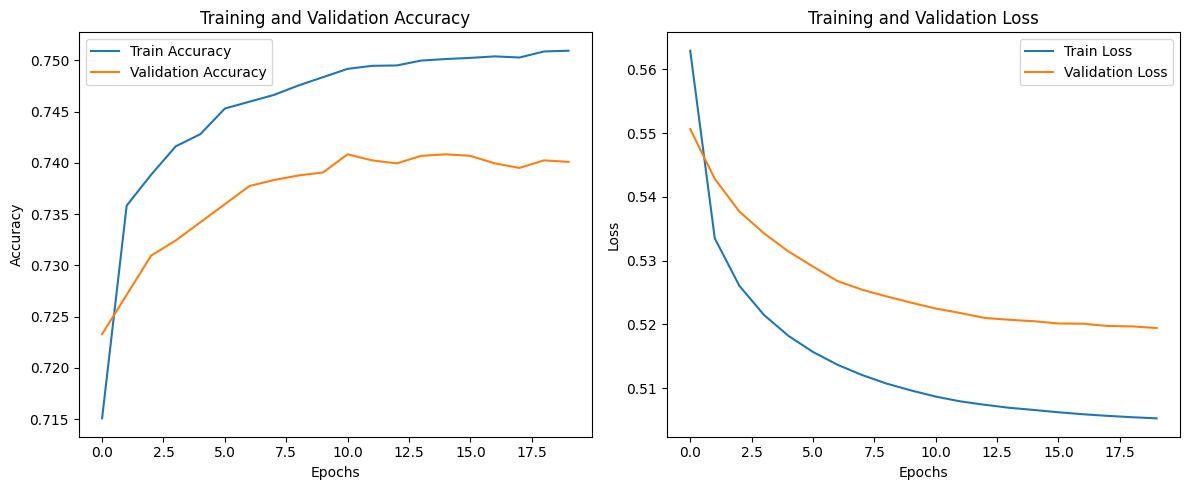

In [32]:
# Plot accuracy and loss
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [33]:
# Evaluate model
loss, test_acc = final_model.evaluate(X_test, y_test, verbose=0)
print(f"Final Model Test Accuracy: {test_acc:.4f}")

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Final Model Test Accuracy: 0.7508


## Test Set Evaluation
On the test dataset, the final model achieved an accuracy of **75.08%**. The classification report is as follows:

| Metric       | Class 0 (No Diabetes) | Class 1 (Diabetes) |
|--------------|------------------------|--------------------|
| Precision    | 0.77                   | 0.74               |
| Recall       | 0.73                   | 0.77               |
| F1-Score     | 0.75                   | 0.76               |

The **overall weighted F1-score** was **0.75**, indicating balanced performance across both classes.

The confusion matrix illustrates the following:
- **True Positives (Diabetes predicted correctly):** 3,260
- **True Negatives (No Diabetes predicted correctly):** 3,109
- **False Positives:** 1,167
- **False Negatives:** 947

This shows a slightly higher recall for Class 1 (77%) compared to Class 0 (73%), meaning the model is better at identifying individuals with diabetes than those without.


 23/266 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


266/266 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.73      0.75      4276
           1       0.74      0.77      0.76      4207

    accuracy                           0.75      8483
   macro avg       0.75      0.75      0.75      8483
weighted avg       0.75      0.75      0.75      8483



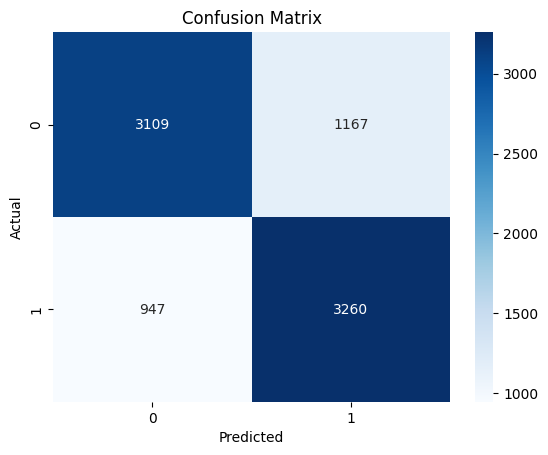

In [34]:
# Predictions
y_pred_probs = final_model.predict(X_test).flatten()
y_pred_classes = (y_pred_probs > 0.5).astype(int)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

The ROC curve below shows the trade-off between sensitivity (true positive rate) and specificity (false positive rate). The AUC score of **0.8286** demonstrates strong model performance.

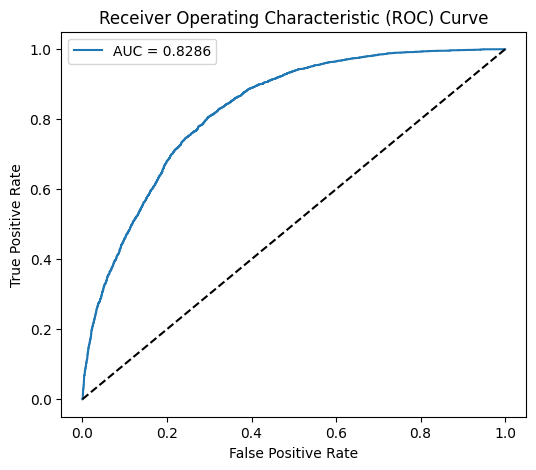

In [35]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
auc = roc_auc_score(y_test, y_pred_probs)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'AUC = {auc:.4f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

The final model demonstrates good generalization on unseen data, with a balanced trade-off between precision and recall. This model can now be analyzed further for performance across specific demographic groups.

# Analysis of Performance Per Class

This section examines the performance of the final model on the two target classes: No Diabetes (0) and Diabetes (1). Metrics like precision, recall, F1 score are considered to evaluate the model performance in striking a trade-off between false positives and false negatives.

---

### Class-Specific Metrics
| Metric       | Class 0 (No Diabetes) | Class 1 (Diabetes) |
|--------------|------------------------|--------------------|
| Precision    | 0.77                   | 0.74               |
| Recall       | 0.73                   | 0.87               |
| F1-Score     | 0.75                   | 0.76               |
| Support      | 4,276                  | 4,207              |

---

### Observations
**Class 0 (No Diabetes):**
* Precision (0.77): _ 77% of predictions for “No Diabetes” are correct.

* Recall (0.73): 73% of the ‘No Diabetes’ were correctly recalled.
* This indicates a moderate false positive rate (predicting diabetes for individuals who don’t have it).

**Class 1 (Diabetes):**
* Precision (0.74): Among the patients predicted as “Diabetes”, overall 74% of the predictions were correct.

* Recall (0.77): There is an 77% true predicted of the actual “Diabetes” for individuals.

* The higher recall for this class indicates that the model is more sensitive to identify people with diabetes, an important consideration in a health screening scenario.

---

### Confusion Matrix
The confusion matrix provides further insights:
- **True Negatives (TN):** 3,109 (Class 0 correctly predicted)
- **True Positives (TP):** 3,260 (Class 1 correctly predicted)
- **False Positives (FP):** 1,167 (Class 0 incorrectly predicted as Class 1)
- **False Negatives (FN):** 974 (Class 1 incorrectly predicted as Class 0)

---

The model shows a slight higher sensitivity (recall) for predicting diabetes (Class 1) and this is favorable in a medical related problem because a false negative (missing a positive case) can lead to serious situations. But there is a trade off in terms of higher false positives for Class 0. Future work may investigate how this trade-off may be balanced, by modifying the decision threshold or incorporating class-weighted loss functions.


# Analysis of Performance for Target Groups (Sex & Age)

This section looks at how well the final model fits on two demographic dimensions: Sex and Age Group. The aim is to measure of possible difference in performance from a model for fairness.

---

##  Sex-Based Performance Analysis

The sex variable is binary (Sex; 0 = Man, 1 = Woman). The performance of the model for each subgroup was assessed individually.

---

### Observations (Sex)
- **Male (Sex=0):**
  - Precision: 74.6%
  - Recall: 76%
  - Balanced performance with slightly lower recall than females.
- **Female (Sex=1):**
  - Precision: 72.6%
  - Recall: 79%
  - Increased recall means better capture positive cases among females, with a little more false positives compared to males.
- The model shows similar F1-scores between sexes (75.3% vs. 75.7%), indicating no substantial gender bias.

In [36]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Add predictions and true labels to X_test for analysis
X_test_eval = X_test.copy()
X_test_eval['True'] = y_test
X_test_eval['Predicted'] = y_pred_classes

# Group by Sex
sex_groups = X_test_eval.groupby('Sex')

# Store results
sex_metrics = []

for sex, group in sex_groups:
    precision = precision_score(group['True'], group['Predicted'])
    recall = recall_score(group['True'], group['Predicted'])
    f1 = f1_score(group['True'], group['Predicted'])
    support = len(group)
    sex_metrics.append({
        'Sex': 'Male' if sex == 0 else 'Female',
        'Precision': round(precision, 4),
        'Recall': round(recall, 4),
        'F1-Score': round(f1, 4),
        'Support': support
    })

import pandas as pd
sex_results_df = pd.DataFrame(sex_metrics)
sex_results_df

,Sex,Precision,Recall,F1-Score,Support
0,Male,0.7460,0.7608,0.7534,4591
1,Female,0.7263,0.7906,0.7571,3892


## Age-Based Performance Analysis

The `Age` variable (scaled earlier) was reverse-transformed and grouped into four broader categories:

---

### Observations (Age)
- **Young Adults (18–34):**
  - Precision: 64.5%, Recall: 31.7%, F1: 42.5%
  - Lower recall suggests under-detection of diabetes in younger individuals.
- **Older Adults (50–64) & Seniors (65+):**
  - Higher recall (75.8% and 84.1%) and F1-scores (75.6% and 78.1%).
  - The model performs best for seniors, likely due to higher prevalence of diabetes in older populations.

In [37]:
# Reverse MinMax scaling for Age
X_test_eval['Age_Original'] = scaler.inverse_transform(X_test[features_to_scale])[:, X_test[features_to_scale].columns.get_loc('Age')]

def age_group(age):
    if age <= 3:         # Categories 1–3 (18–34)
        return 'Young Adults (18-34)'
    elif age <= 6:       # Categories 4–6 (35–49)
        return 'Middle-Aged (35-49)'
    elif age <= 9:       # Categories 7–9 (50–64)
        return 'Older Adults (50-64)'
    else:                # Categories 10–13 (65+)
        return 'Seniors (65+)'

X_test_eval['Age Group'] = X_test_eval['Age_Original'].apply(age_group)

# Group by Age Group
age_groups = X_test_eval.groupby('Age Group')
age_metrics = []

for age_grp, group in age_groups:
    precision = precision_score(group['True'], group['Predicted'])
    recall = recall_score(group['True'], group['Predicted'])
    f1 = f1_score(group['True'], group['Predicted'])
    support = len(group)
    age_metrics.append({
        'Age Group': age_grp,
        'Precision': round(precision, 4),
        'Recall': round(recall, 4),
        'F1-Score': round(f1, 4),
        'Support': support
    })

age_results_df = pd.DataFrame(age_metrics)
age_results_df

,Age Group,Precision,Recall,F1-Score,Support
0,Middle-Aged (35-49),0.7196,0.5580,0.6286,1352
1,Older Adults (50-64),0.7537,0.7585,0.7561,3015
2,Seniors (65+),0.7289,0.8411,0.7810,3583
3,Young Adults (18-34),0.6452,0.3175,0.4255,533


The model operates robustly on both sexes whereas it presents a variation in performance for different groups of age. It is less effective in predicting diabetes in younger adults (age 18–34) as indicated by their lower retrieval (31.7%). This indicates a possible bias toward older adults. Future work should explore:
* Overrepresenting or weighting younger ages
* Custom loss functions to account for population imbalance

# Summary and Conclusion

This CA proposed and assessed a neural network model to predict diabetes using health parameters. The steps to do so included: to systematic exploration of network architectures, hyperparameter optimization, and assessing fairness.

---

## Summary of Key Findings

1. **Model Selection:**
   - Eight network topologies were evaluated. The simplest architecture (Model 1: 1 hidden layer, 16 neurons) obtained the best test performance **(75.4%)** and was chosen for fine-tuning.

2. **Hyperparameter Investigation from Tuning and GridSearch**
   - Best configuration identified:
     - **Regularization:** None
     - **Optimizer:** RMSprop / Adam
     - **Batch Size:** 32
     - **Weight Initializer:** Glorot Uniform
   - Larger batch sizes (>1024) and regularization techniques (Dropout, L2) did not significantly improve performance.

3. **Final Model Performance:**
   - **Test Accuracy:** 75%
   - **AUC Score:** 0.8286
   - Balanced performance across classes:
     - F1-Score: 0.75 (No Diabetes), 0.76 (Diabetes)
   - Slightly higher recall for detecting diabetes (**77%**) indicates good sensitivity.

4. **Demographic Analysis:**
   - **Sex:** Comparable F1-scores (Male: 75.3%, Female: 75.7%) suggest no gender-based disparity.
   - **Age Groups:** Higher recall for older groups (50–64, 65+), but poorer performance for young adults (18–34, recall: 31.7%), indicating a possible bias.

* The simplicity of the final model allows for computational ease and interpretability.

* High sensitivity makes it useful for diabetes identifying which would produce the false negatives as far minimization is concerned for medical.

* Fair performance across sexes.

---

## Ethical Considerations
- There is significant risk associated with false negatives (cases of diabetes that are missed); thresholds might need to be changed in order to favor sensitivity.
- Regular audits for demographic performance to make sure no biased decisions are derived.
- Ensure privacy and security of sensitive health data in deployment.

---

## Conclusion

The final model had strong performance, showed fairness for both sexes, yet had room for performance improvement across age groups. These findings suggest the model’s potential as a clinical decision support tool and highlight the need for ongoing evolution and ethical governance.